## TITANIC DATASET INTRODUCTION

Data Dictionary of this data set:

Surviaval(0 = No, 1 = Yes )

survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown,

#Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## IMPORTING LIBRARIES STEP 1

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
#import missingno as mg 
from matplotlib import pyplot as plt
from sklearn import preprocessing 
import re
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
import researchpy as rp

#  Data Modelling Libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
from collections import Counter
sns.set(style = 'white' , context = 'notebook', palette = 'deep')
warnings.filterwarnings('ignore', category = DeprecationWarning)
%matplotlib inline
import pandas_profiling as pp
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
import pandas as pd
from pylab import rcParams
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
from dtreeviz.trees import dtreeviz # remember to load the package
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import preprocessing,tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
import sklearn.tree
import sklearn.ensemble
import sklearn.metrics
import joblib
import xgboost
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy
import graphviz
import xgboost as xgb 
from xgboost import XGBClassifier

## LOADING DATAS (from .csv format and getting knowledge about the dataset) STEP 2

In [2]:


train_data=pd.read_csv("train[1].csv", sep=",")
test_data=pd.read_csv("test[1].csv", sep=",")


In [3]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## DATA QUALITY CHECK - STEP 3

In [5]:
print("DATA PREPROCESSING FIRST STEP \n" ) 
print("First 10 rows of the train data: \n")
display(train_data.head(10))


DATA PREPROCESSING FIRST STEP 

First 10 rows of the train data: 



PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [6]:
#Returns size of dataframe/series which is equivalent to total number of elements. That is rows x columns.
print("Dataset size : ",train_data.size)


Dataset size :  10692


In [7]:
print("Shape of dataset  : ", train_data.shape) #Returns tuple of shape (Rows, columns) of dataframe/series


Shape of dataset  :  (891, 12)


In [8]:
print("Dimension of dataset  : ", train_data.ndim) #Returns dimension of dataframe/series. 1 for one dimension (series), 2 for two dimension (dataframe) 


Dimension of dataset  :  2


In [9]:
train_data.describe().T
# It finds: count,mean or average,standart deviation,min,25th percentiles,50th percentiles,75th percentiles,max values
#Age and Fare important to us.
##passengerId will be delated later because it doesn't effect our conclusion.

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [10]:
#In this step relationship betwwen attributes is examined. 
#If the correlation coefficient is negative, there is an inverse relationship between the two variables, ie "one of the variables increases while the other is decreasing". 
#If the correlation coefficient is positive, it is interpreted that "one of the variables increases while the other increases". If 0.8>, it is interpreted that there is a very high correlation.

correlation = train_data.corr()
print(correlation)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<AxesSubplot:>

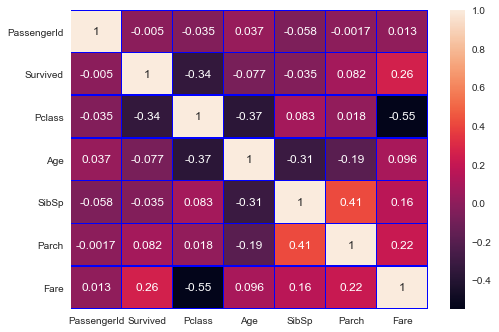

In [11]:
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)


## MISSING VALUE CHECK- Step 4

In [12]:
train_data.isnull().values.any() #If it returns true it means that we have a missing value


True

In [13]:
# Create table for missing data analysis-1
print("Missing values in the train data : ")
display(train_data.isnull().sum())


Missing values in the train data : 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Create table for missing data analysis-2
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    
    return pd.concat([Total,Percentage] , axis = 1 , keys = ['Total' , 'Percent'])

print("Missing values in the train data as Total and Percentage : \n")
display(find_missing_data(train_data))

print("Missing values in the test data as Total and Percentage : \n")
find_missing_data(test_data)


Missing values in the train data as Total and Percentage : 



Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000

Missing values in the test data as Total and Percentage : 



Total   Percent
Cabin          327  0.782297
Age             86  0.205742
Fare             1  0.002392
Embarked         0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
PassengerId      0  0.000000

<AxesSubplot:>

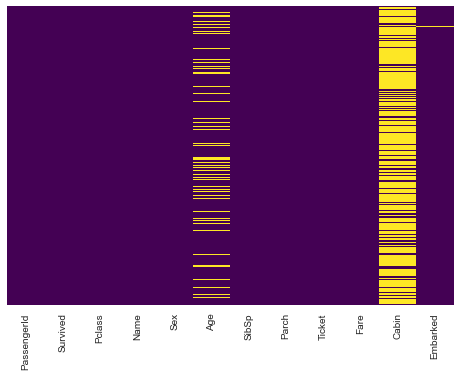

In [15]:
# checking only train set - visualize
sns.heatmap(train_data.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis') #This map shows us the Cabain and Age columns have lots of missing values, in next steps these columns must be filled. 

# TARGET IDENTIFICATION

<AxesSubplot:xlabel='Survived', ylabel='count'>

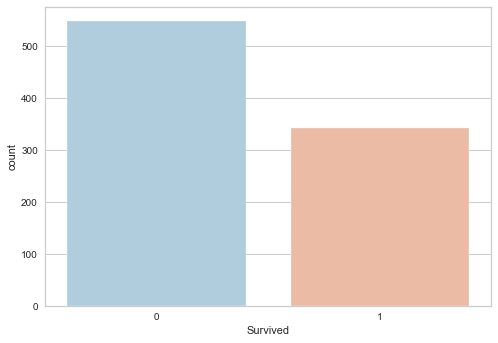

In [16]:
# Our target is completely about Survived value((0/1, Not-survived/Survived)
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data,palette='RdBu_r')

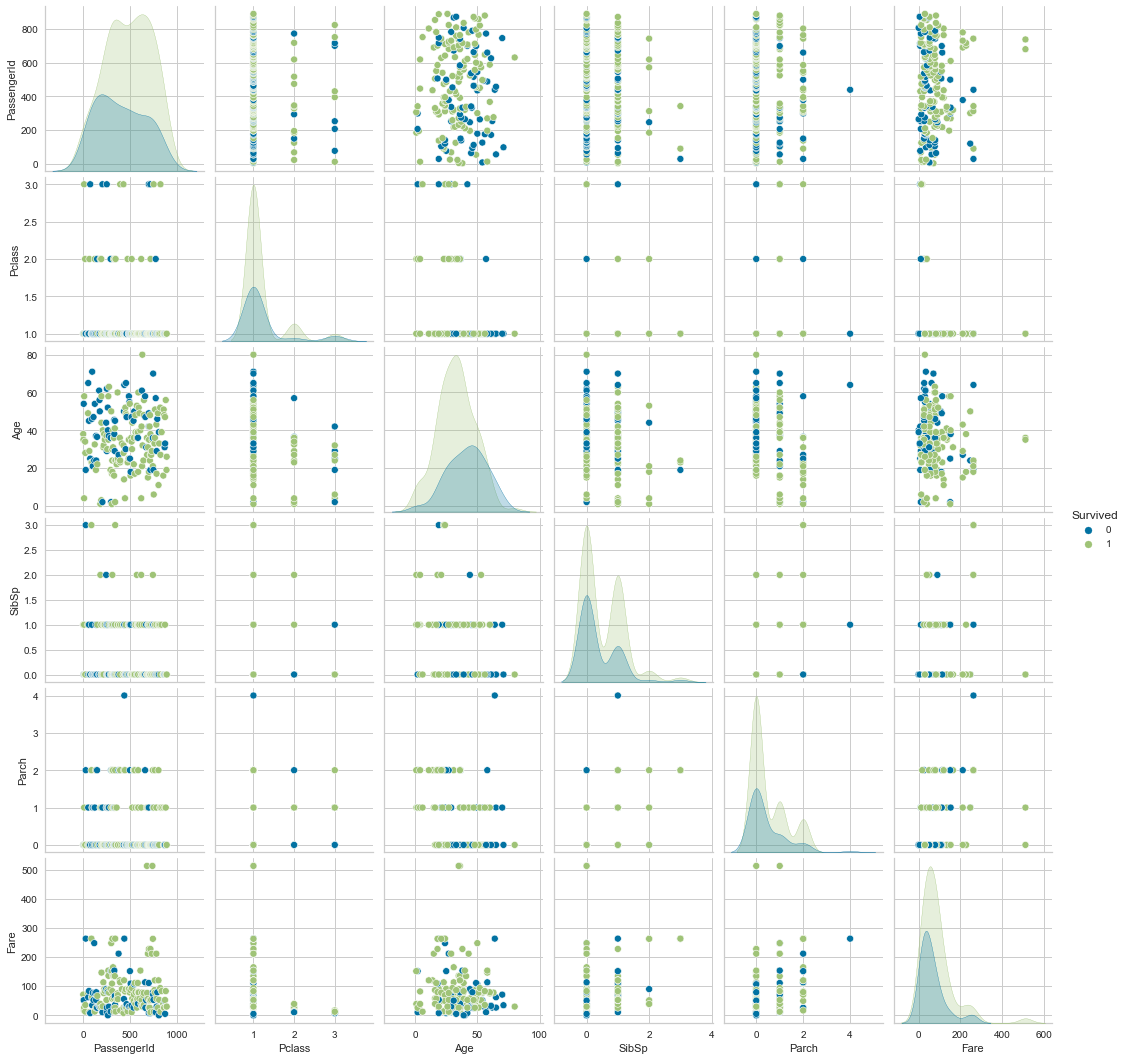

In [17]:
sns.pairplot(train_data.dropna(), hue='Survived')

In [18]:
train_data.shape

(891, 12)

Deleting Embarked Missing Values- STEP 4 Cont.


In [19]:
#I selected not missing values in Embarked Column
train_data = train_data[train_data['Embarked'].notna()]


In [20]:
find_missing_data(train_data)

Total   Percent
Cabin          687  0.772778
Age            177  0.199100
Embarked         0  0.000000
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000

In [21]:
# Count
print(train_data.groupby(['Embarked'])['PassengerId'].count())

# Compare with other variables
train_data.groupby(['Embarked']).mean()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64


PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Embarked                                                                   
C          445.357143  0.553571  1.886905  30.814769  0.386905  0.363095   
Q          417.896104  0.389610  2.909091  28.089286  0.428571  0.168831   
S          449.527950  0.336957  2.350932  29.445397  0.571429  0.413043   

               Fare  
Embarked             
C         59.954144  
Q         13.276030  
S         27.079812

Deleting Cabin Missing Values- STEP 4 Cont.

In [22]:
train_data.shape

(889, 12)

In [23]:
#I selected not missing values in Cabin Column
#train_data = train_data[train_data['Cabin'].notna()]


In [24]:
find_missing_data(train_data)

Total   Percent
Cabin          687  0.772778
Age            177  0.199100
Embarked         0  0.000000
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000

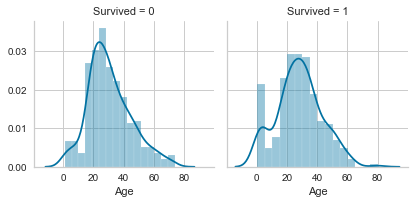

In [25]:
# Explore the Age vs Survived features
age_survived = sns.FacetGrid(train_data, col='Survived')
age_survived = age_survived.map(sns.distplot, "Age")


# OUTLIER CHECK STEP 5 (for AGE VALUES)

In [26]:
# In age column,we have a outliers as 80. I understood this in max value is too high than mean value. So, we have to eliminate age==80 values.

train_data = train_data[train_data['Age']<train_data['Age'].quantile(0.98)] 
# or it can be used: train_data = train_data[train_data['Age']<80]

In [27]:
#We can easily see max Age max values = 65, before this operation this value equals=80
train_data.describe().T

count        mean         std   min     25%    50%       75%  \
PassengerId  697.0  449.374462  258.786739  1.00  223.00  444.0  679.0000   
Survived     697.0    0.408895    0.491983  0.00    0.00    0.0    1.0000   
Pclass       697.0    2.252511    0.831802  1.00    1.00    3.0    3.0000   
Age          697.0   28.814448   13.473813  0.42   20.00   28.0   37.0000   
SibSp        697.0    0.520803    0.937676  0.00    0.00    0.0    1.0000   
Parch        697.0    0.433286    0.850243  0.00    0.00    0.0    1.0000   
Fare         697.0   34.314741   52.687406  0.00    8.05   15.5   32.3208   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           62.0000  
SibSp          5.0000  
Parch          6.0000  
Fare         512.3292

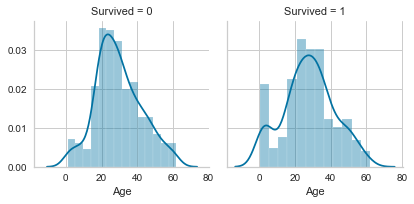

In [28]:
age_survived = sns.FacetGrid(train_data, col='Survived')
age_survived = age_survived.map(sns.distplot, "Age")

In [29]:
# OUTLIER CHECK STEP 5 (for Fare)

We can see in Fare column, we can easily see there is a outlier like 512. So I want to choose fare values without outliers.

<AxesSubplot:>

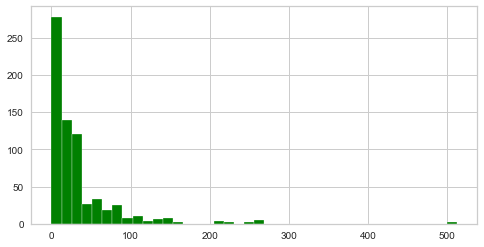

In [30]:
train_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

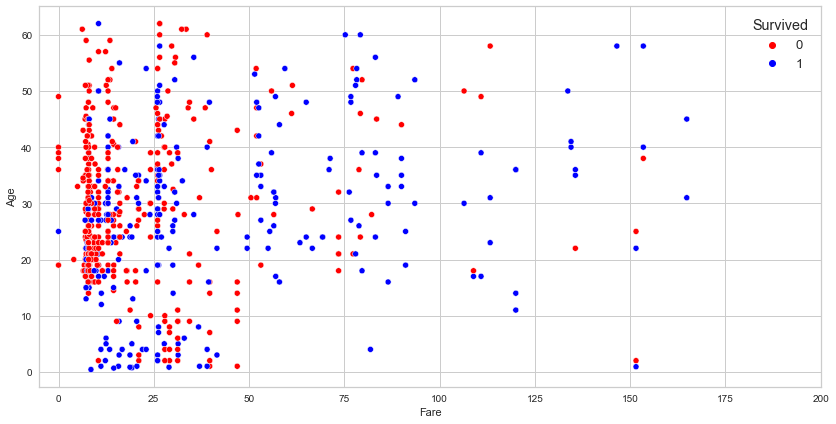

In [31]:
fig, ax = plt.subplots(figsize=(14,7))
plt.xlim(-5,200)

with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.scatterplot(
        x='Fare',
        y='Age',
        hue='Survived',
        palette=['red','blue'],
        data=train_data,
        ax=ax
    )

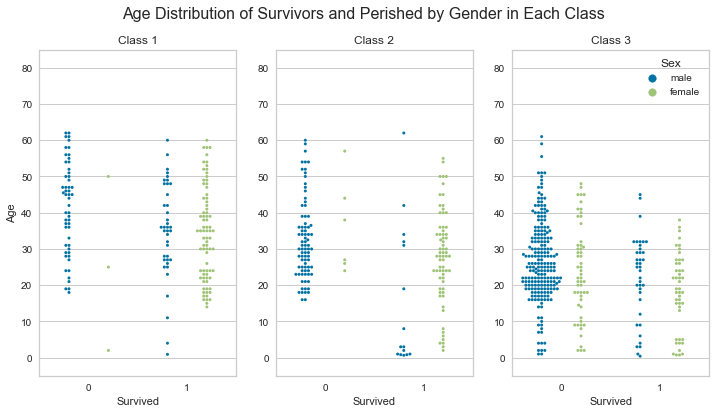

In [32]:
#We can set dodge as True in the swarmplot to split the distributions
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
plt.suptitle('Age Distribution of Survivors and Perished by Gender in Each Class', fontsize=16)

for i in range(3):
    ax[i].set_title('Class {}'.format(i+1))
    ax[i].set_ylim(-5,85)
    sns.swarmplot(data=train_data[train_data['Pclass']==i+1],
                  x='Survived',
                  y='Age',
                  hue='Sex',
                  hue_order=['male','female'],
                  size=3,
                  dodge=True,
                  ax=ax[i])

ax[1].set_ylabel(None)
ax[2].set_ylabel(None)

ax[0].legend_.remove()
ax[1].legend_.remove()

In [33]:
train_data = train_data[train_data['Fare']<train_data['Fare'].quantile(0.99)] 
# or it can be used: train_data = train_data[train_data['Fare']<500]

In [34]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   689.000000  689.000000  689.000000  689.000000  689.000000   
mean    449.960813    0.403483    2.267054   28.842772    0.507983   
std     258.614673    0.490953    0.825521   13.527230    0.924635   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.000000    0.000000    2.000000   20.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     678.000000    1.000000    3.000000   37.000000    1.000000   
max     891.000000    1.000000    3.000000   62.000000    5.000000   

            Parch        Fare  
count  689.000000  689.000000  
mean     0.422351   30.575671  
std      0.844007   37.664950  
min      0.000000    0.000000  
25%      0.000000    8.050000  
50%      0.000000   15.045800  
75%      1.000000   31.275000  
max      6.000000  247.520800

In [35]:
pd.crosstab([train_data.Embarked, train_data.Pclass], [train_data.Sex, train_data.Survived], margins = True).style.background_gradient(cmap = 'cubehelix_r')

# From now we know the means of sex groups.

In [36]:
SexMeanValue=train_data.groupby('Sex')['Age'].mean()
SexMeanValue

Sex
female    27.535714
male      29.596499
Name: Age, dtype: float64

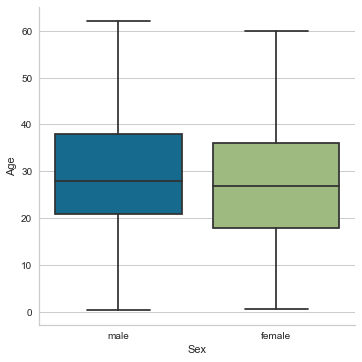

In [37]:
AS = sns.factorplot(y="Age", x="Sex", data = train_data, kind="box")


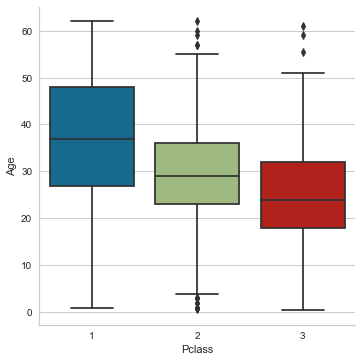

In [38]:
PA = sns.factorplot(data = train_data , x = 'Pclass' , y = 'Age', kind = 'box')

# FEATURE EXTRACTION


# -Filling Age column is filling with name rel. using Salutation (fillna)

In [39]:
train_data['Salutation'] = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())


In [40]:
train_data.head(10)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   

    Parch            Ticket     Fare Cabin Embarked Salutation  
0       0         A/5 21171   7.2500   NaN        S         Mr  
1       0          PC 17599  71.2833   C85        C        Mrs  
2       0  STON/O2. 3101282   7.9250   NaN        S       Miss  
3       0            113803  53.1000  C123        S        Mrs  
4       0            373450   8.0500   NaN        S         Mr  
6       0             17463  51.8625   E46        S         Mr  
7       1            349909  21.0750   NaN        S     Master  
8       2            347742  11.1333   NaN        S        Mrs  
9       0            237736  30.0708   NaN        C        Mrs  
10      1           PP 9549  16.7000    G6        S       Miss

In [41]:
test_data.head(5)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [42]:
train_data['Age'].fillna(train_data.groupby(["Salutation","Sex"])['Age'].transform('median'),inplace=True)


In [43]:
# All missing values in age column are filled with name and Sex


(train_data)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked Salutation  
0        0         A/5 21171   7.2500   NaN        S         Mr  
1        0          PC 17599  71.2833   C85        C        Mrs  
2        0  STON/O2. 3101282   7.9250   NaN        S       Miss  
3        0            113803  53.1000  C123        S        Mrs  
4        0            373450   8.0500   NaN        S         Mr  
..     ...               ...      ...   ...      ...        ...  
885      5            382652  29.1250   NaN        Q        Mrs  
886      0            211536  13.0000   NaN        S        Rev  
887      0            112053  30.0000   B42        S       Miss  
889      0            111369  30.0000  C148        C         Mr  
890      0            370376   7.7500   NaN        Q         Mr  

[689 rows x 13 columns]

In [44]:
find_missing_data(test_data)

Total   Percent
Cabin          327  0.782297
Age             86  0.205742
Fare             1  0.002392
Embarked         0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
PassengerId      0  0.000000

In [45]:
SexMeanValue=train_data.groupby('Sex')['Age'].mean()
SexMeanValue

Sex
female    27.535714
male      29.596499
Name: Age, dtype: float64

# Gropuping Age Values (Babies=<2, Little Children= <7 ,Children 0-15, Adults 15-45 , Elder 45+)

In [46]:
# In this case I wanted to see effects of Age groups on Survived/Not Survived
babies= train_data[train_data['Age']<=2]
little_children = train_data[train_data['Age']<7]
children= train_data[(train_data['Age']>=7) & (train_data['Age']<15)]
Adult= train_data[(train_data['Age']>=15) & (train_data['Age']<45)]
Elder= train_data[(train_data['Age']>=45) & (train_data['Age']<=65)]


In [47]:
def age_status(row):
   if row['Age'] <= 2 :
      return 'Baby'
   if (row['Age'] > 2) & (row['Age'] <= 7) :
      return 'Little Children'
   if (row['Age'] > 7) & (row['Age'] <= 15) :
      return 'Children'
   if (row['Age'] > 15) & (row['Age'] <= 45):
      return 'Adult'
   if (row['Age'] > 45) :
      return 'Elder'
    
   return 'Other'
   
   
train_data['Age_Status'] = train_data.apply (lambda row: age_status(row), axis=1)
test_data['Age_Status'] = test_data.apply (lambda row: age_status(row), axis=1)

train_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Salutation Age_Status  
0      0         A/5 21171   7.2500   NaN        S         Mr      Adult  
1      0          PC 17599  71.2833   C85        C        Mrs      Adult  
2      0  STON/O2. 3101282   7.9250   NaN        S       Miss      Adult  
3      0            113803  53.1000  C123        S        Mrs      Adult  
4      0            373450   8.0500   NaN        S         Mr      Adult

In [48]:
crosstab, test_results, expected = rp.crosstab(train_data['Survived'],train_data['Age_Status'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

display(test_results)
#I considir ed p-value. If p value grater than 0.05 it means that meaningless(no-ralationship). 
#But in this case our p-value is 0.03 soo it means that there is a relationship between Age_Status and Survived.(anlamlı)

Chi-square test  results
0  Pearson Chi-square ( 4.0) =   18.5417
1                    p-value =    0.0010
2                 Cramer's V =    0.1640

In [49]:
display(crosstab)
#I want to show respectively survived rate between age_status.
#In first case survived=0 1% of those who did not live were babies, but does'nt matter all baby percentage is %2.84.
#In first case survived=0 17% of those who did not live were adult, there is already a significant percentage of adults in my dataset.

#In second case survived=1 47% of those who did not live were adult, there is already a significant percentage of adults in my dataset.
#In second case survived=1 babies 1.7% of those who did not live ,  but does'nt matter all baby percentage is %2.84.
# As a result, there is a relationship, but not entirely open to interpretation.

Age_Status                                              
Age_Status      Adult  Baby Children  Elder Little Children     All
Survived                                                           
0               47.02  1.31     2.61   7.69            1.02   59.65
1               28.30  2.18     2.18   4.93            2.76   40.35
All             75.33  3.48     4.79  12.63            3.77  100.00

<AxesSubplot:xlabel='Age_Status', ylabel='count'>

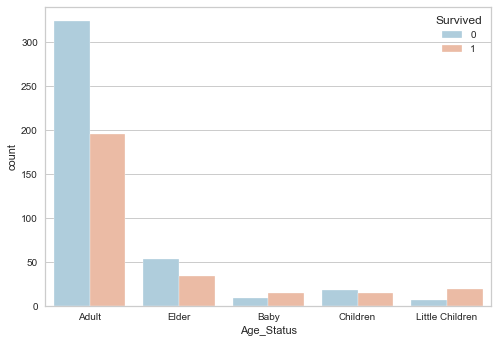

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='Age_Status',hue='Survived',data=train_data,palette='RdBu_r')

In [51]:
crosstab, test_results, expected = rp.crosstab(train_data['Survived'],train_data['Sex'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

display(test_results)
#I consided p-value. If p value= 0.00 it means that there is a meaning and relationship between Survived and Sex.

Chi-square test   results
0  Pearson Chi-square ( 1.0) =   193.7020
1                    p-value =     0.0000
2               Cramer's phi =     0.5302

In [52]:
display(crosstab)
# we can see that most of the dead are men.
# we can say that most of the survived are women.

Sex               
Sex      female   male     All
Survived                      
0          9.29  50.36   59.65
1         27.29  13.06   40.35
All       36.57  63.43  100.00

In [53]:
train_data[train_data['Age_Status']=='Adult']['Sex'].value_counts()

male      337
female    182
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

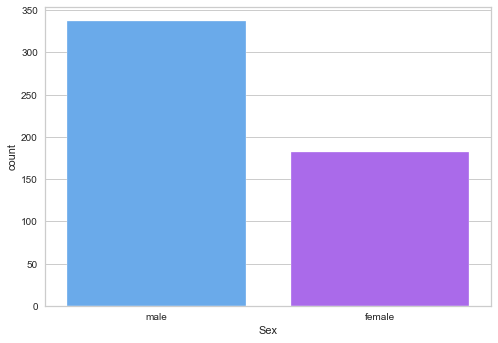

In [54]:
sns.countplot(train_data[train_data['Age_Status']=='Adult']['Sex'],palette='cool')

<AxesSubplot:title={'center':'Adult'}, ylabel='Sex'>

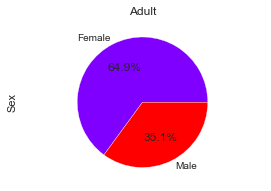

In [55]:
adult_df=train_data[train_data['Age_Status']=='Adult']
plt.figure(figsize=(20,3))

plt.subplot(144)
plt.axis('equal')
plt.title('Adult')
adult_df['Sex'].value_counts().plot.pie(labels=['Female','Male'],
        autopct='%1.1f%%',colormap='rainbow')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

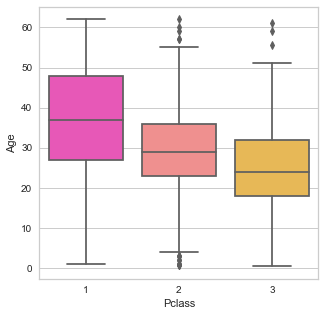

In [56]:
# Average age and passanger class
plt.figure(figsize=(5, 5))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='spring')


In [57]:
train_data[train_data['Age_Status']=='Adult']['Pclass'].value_counts()

3    279
2    131
1    109
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

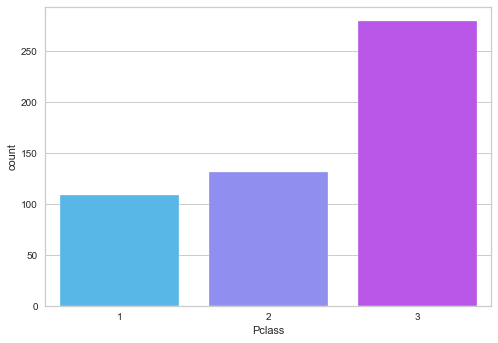

In [58]:
sns.countplot(train_data[train_data['Age_Status']=='Adult']['Pclass'],palette='cool')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

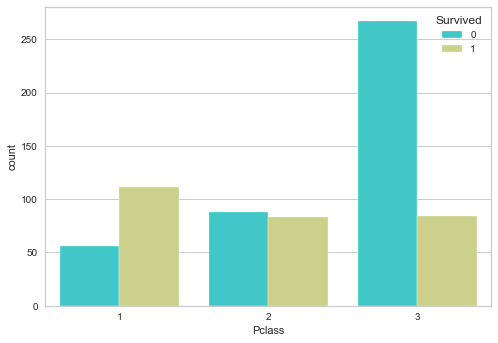

In [59]:
# Survived or Not Survived rates relationships with Pclass(1-2-3)
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=train_data,palette='rainbow')


As we can interpret plot,

-All passengers who did not survive are third-class passengers.
First class passengers are the most surviving passengers.

In [60]:

embarked_dict = {
    'C':"Cherbourg",
    'S':"Southampton",
    'Q':"Queenstown",
}


In [61]:
#Embarked Visualization and Filling 

#emberked_values = train_data["Embarked"].copy() 
#emberked_values.head()
#emberked_values.replace(embarked_dict, inplace = True)
#emberked_values.replace("C",embarked_dict['C'], inplace = True)
#emberked_values.replace("S",embarked_dict['S'], inplace = True)
#emberked_values.replace("Q",embarked_dict['Q'], inplace = True)
#train_data["Embarked"] = emberked_values


train_data = train_data.replace({"Embarked": embarked_dict})

train_data.head()



PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin     Embarked Salutation Age_Status  
0      0         A/5 21171   7.2500   NaN  Southampton         Mr      Adult  
1      0          PC 17599  71.2833   C85    Cherbourg        Mrs      Adult  
2      0  STON/O2. 3101282   7.9250   NaN  Southampton       Miss      Adult  
3      0            113803  53.1000  C123  Southampton        Mrs      Adult  
4      0            373450   8.0500   NaN  Southampton         Mr      Adult

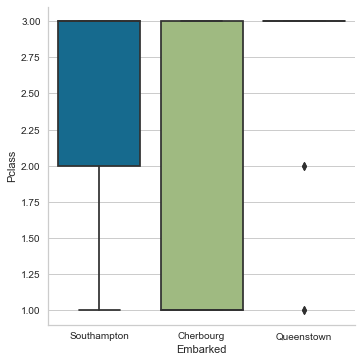

In [62]:
PA = sns.factorplot(data = train_data , x = 'Embarked' , y = 'Pclass', kind = 'box')

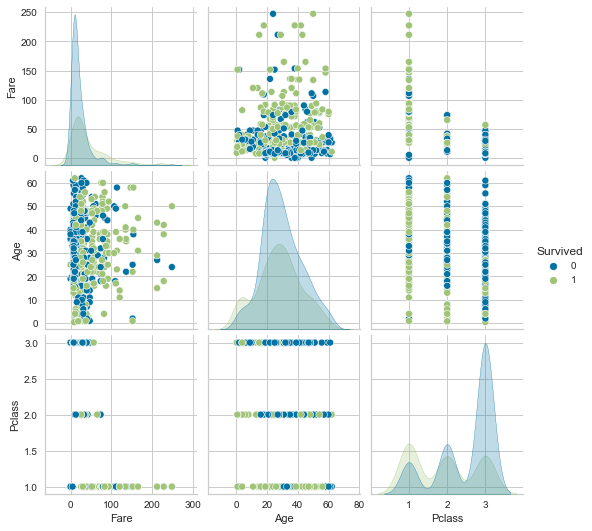

In [63]:
sns.pairplot(data=train_data[["Fare", "Survived", "Age", "Pclass"]], hue = "Survived", dropna = True);

## TRYING TO FIND MORE RELATIONSHIPS ABOUT COLUMNS WITH OUR TARGET (SURVIVED-NOT SURVIVED)

<AxesSubplot:xlabel='Survived', ylabel='count'>

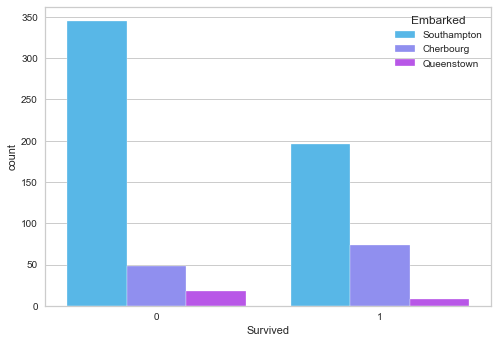

In [64]:
# Survived or Not Survived rates relationships with Embarked(S-C-Q)
#This plot shows us most of those who didn't survive were gpalette='winter'oing to embarked=s
# So, people who survived is generally bought the ticket in Southampton

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=train_data,palette='cool')

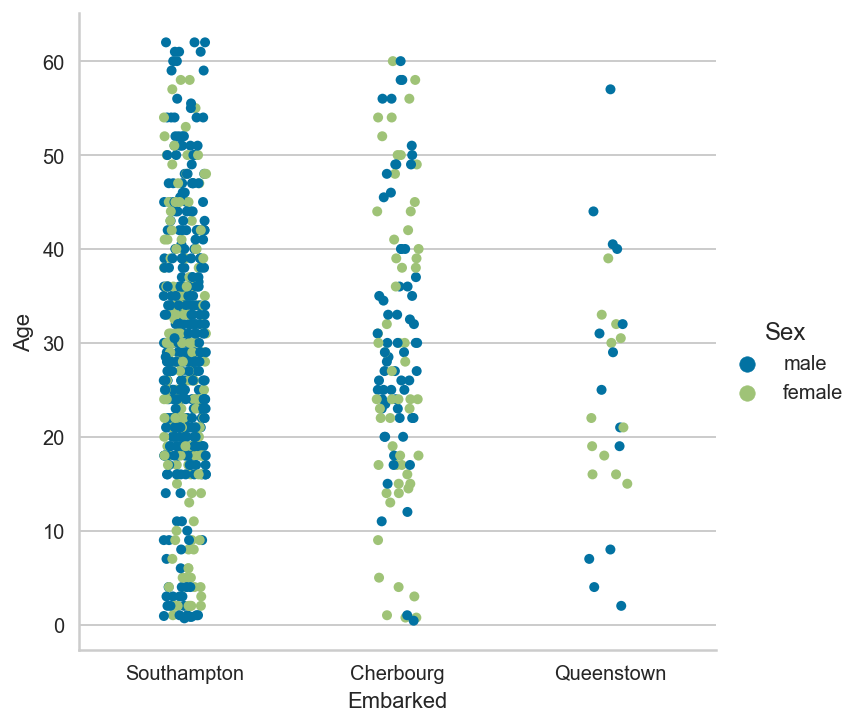

In [65]:
%config InlineBackend.figure_format = "retina"
sns.catplot(x="Embarked", y="Age", data = train_data, hue = "Sex");

<AxesSubplot:xlabel='Survived', ylabel='count'>

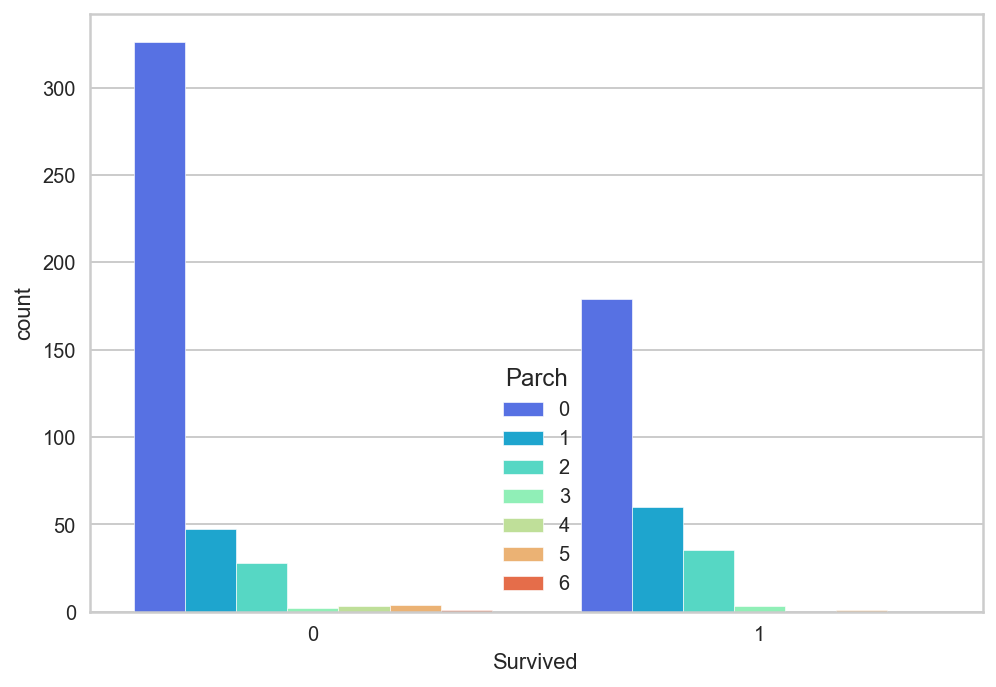

In [66]:
# Survived or Not Survived rates relationships with Parch
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Parch',data=train_data,palette='rainbow')


<AxesSubplot:title={'center':'no_parch'}, ylabel='Survived'>

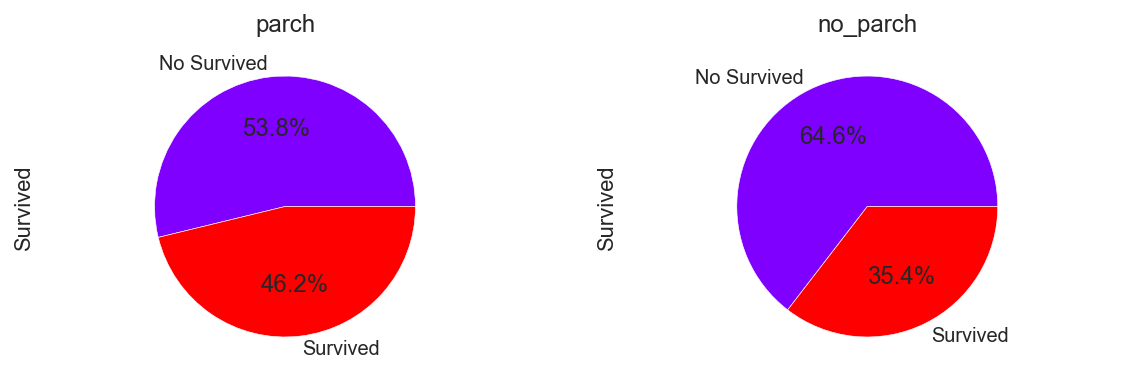

In [67]:
parch_df=train_data[train_data['Parch']!=0]
no_parch_df=train_data[train_data['Parch']==0]
plt.figure(figsize=(20,3))
plt.subplot(143)
plt.axis('equal')
plt.title('parch')
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],
        autopct='%1.1f%%',colormap='rainbow')
plt.subplot(144)
plt.axis('equal')
plt.title('no_parch')
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],
        autopct='%1.1f%%',colormap='rainbow')

In this plot, clearly I see that those who do not have parch survive more than those who have siblings. It is also clear that most people with parch did not survive.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

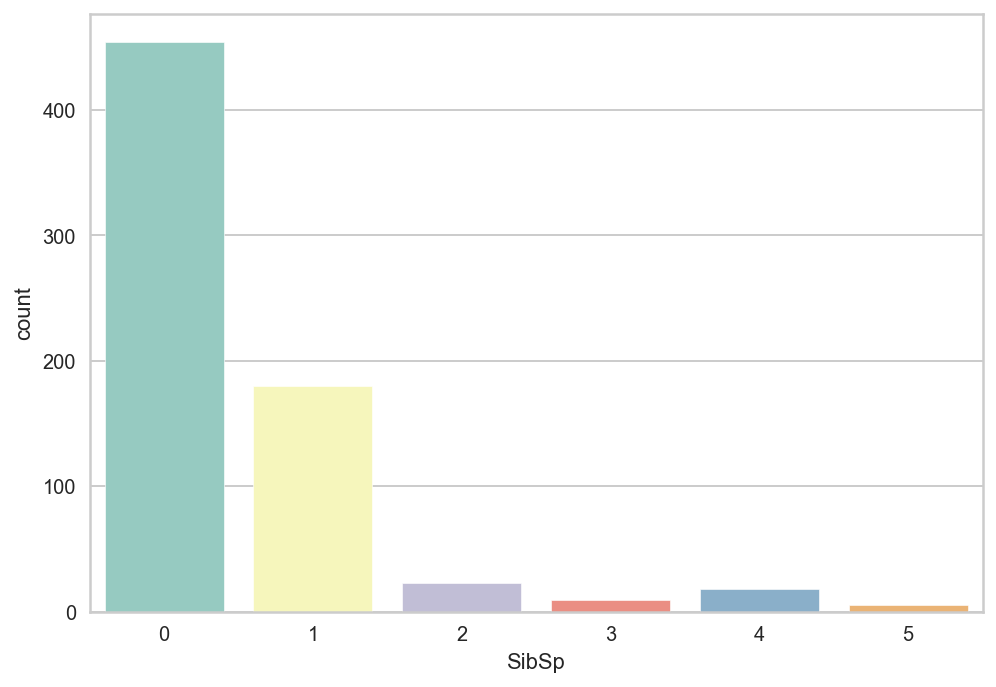

In [68]:
sns.countplot(x='SibSp',data=train_data,palette='Set3')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

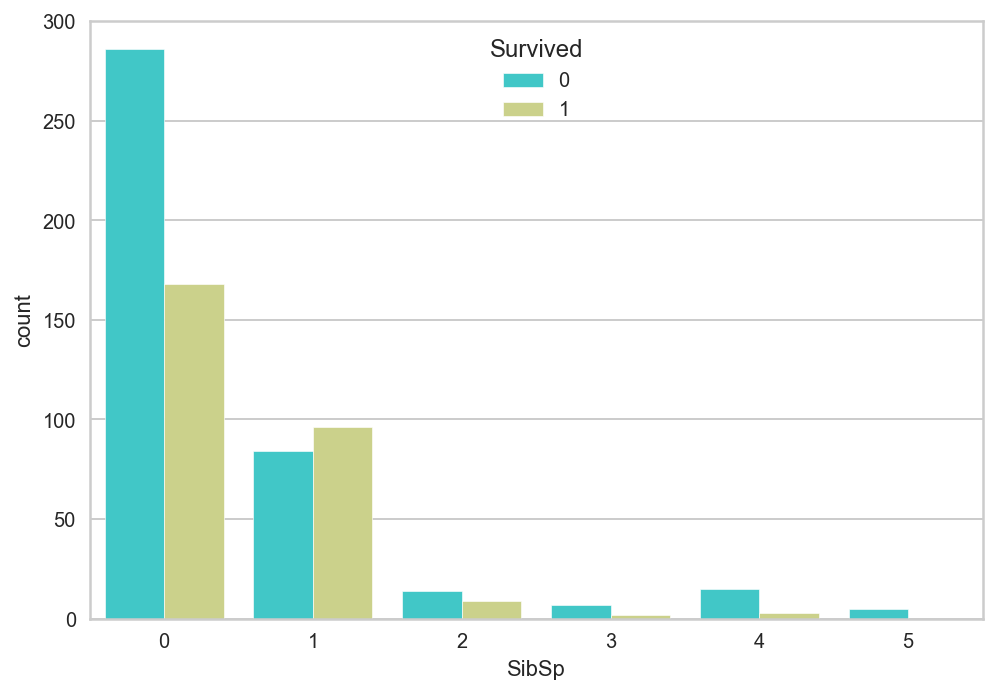

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',hue='Survived',data=train_data,palette='rainbow')

<AxesSubplot:title={'center':'no_sibsp'}, ylabel='Survived'>

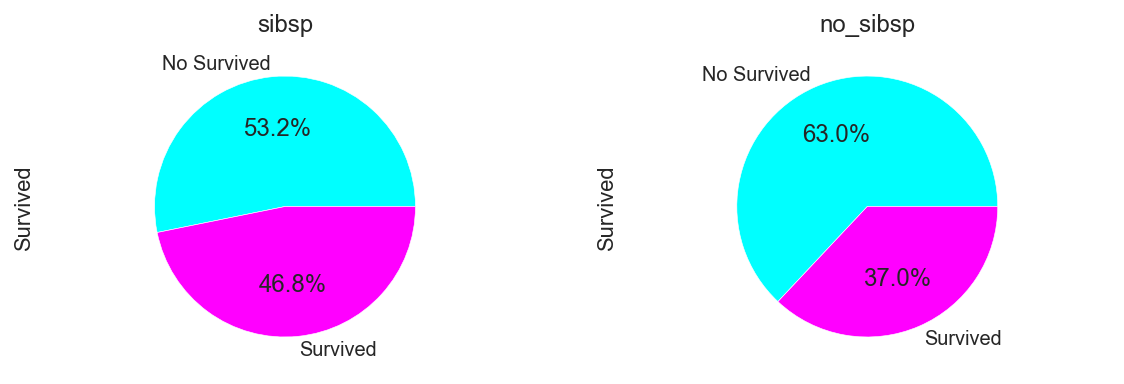

In [70]:
sibsp_df=train_data[train_data['SibSp']!=0]
no_sibsp_df=train_data[train_data['SibSp']==0]
plt.figure(figsize=(20,3))
plt.subplot(141)
plt.axis('equal')
plt.title('sibsp')
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],
        autopct='%1.1f%%',colormap='cool')
plt.subplot(142)
plt.axis('equal')
plt.title('no_sibsp')
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],
        autopct='%1.1f%%',colormap='cool')

In [71]:
#Relationship between total and survival
#Using Parch and SibSp to create a new parameter FamilySize +1 is because of calculating myself
def family_size(row):
    return row['Parch'] + row['SibSp'] + 1

train_data['FamilySize'] = train_data.apply(lambda row: family_size(row), axis=1)
test_data['FamilySize'] = test_data.apply(lambda row: family_size(row), axis=1)

train_data.head(10)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   

    Parch            Ticket     Fare Cabin     Embarked Salutation  \
0       0         A/5 21171   7.2500   NaN  Southampton         Mr   
1       0          PC 17599  71.2833   C85    Cherbourg        Mrs   
2       0  STON/O2. 3101282   7.9250   NaN  Southampton       Miss   
3       0            113803  53.1000  C123  Southampton        Mrs   
4       0            373450   8.0500   NaN  Southampton         Mr   
6       0             17463  51.8625   E46  Southampton         Mr   
7       1            349909  21.0750   NaN  Southampton     Master   
8       2            347742  11.1333   NaN  Southampton        Mrs   
9       0            237736  30.0708   NaN    Cherbourg        Mrs   
10      1           PP 9549  16.7000    G6  Southampton       Miss   

         Age_Status  FamilySize  
0             Adult           2  
1             Adult           2  
2             Adult           1  
3             Adult           2  
4             Adult           1  
6             Elder           1  
7              Baby           5  
8             Adult           3  
9          Children           2  
10  Little Children           3

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

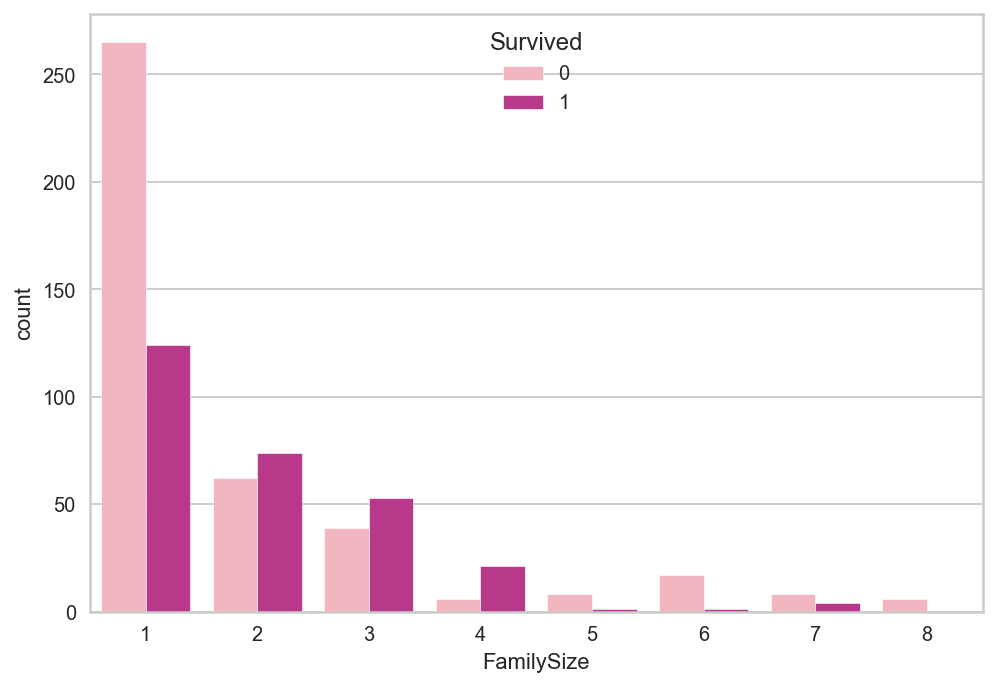

In [72]:
sns.set_style('whitegrid')
sns.countplot(x='FamilySize',hue='Survived',data=train_data,palette='RdPu')

In [73]:
train_data['TravelAlone'] = train_data.FamilySize.map(lambda x: 1 if x <=1 else 0)
test_data['TravelAlone'] = test_data.FamilySize.map(lambda x: 1 if x <=1 else 0 )
#1 tek kişi 1
#kalabalıksa 0


<AxesSubplot:xlabel='TravelAlone', ylabel='count'>

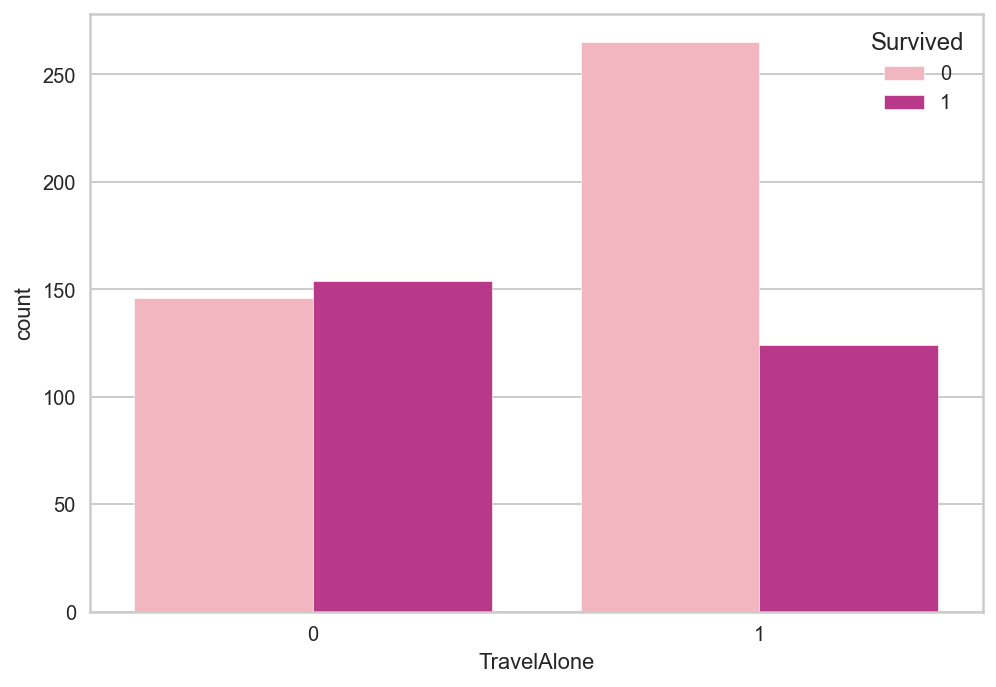

In [74]:
# Survived or Not Survived rates relationships with TravelAlone
sns.set_style('whitegrid')
sns.countplot(x='TravelAlone',hue='Survived',data=train_data,palette='RdPu')

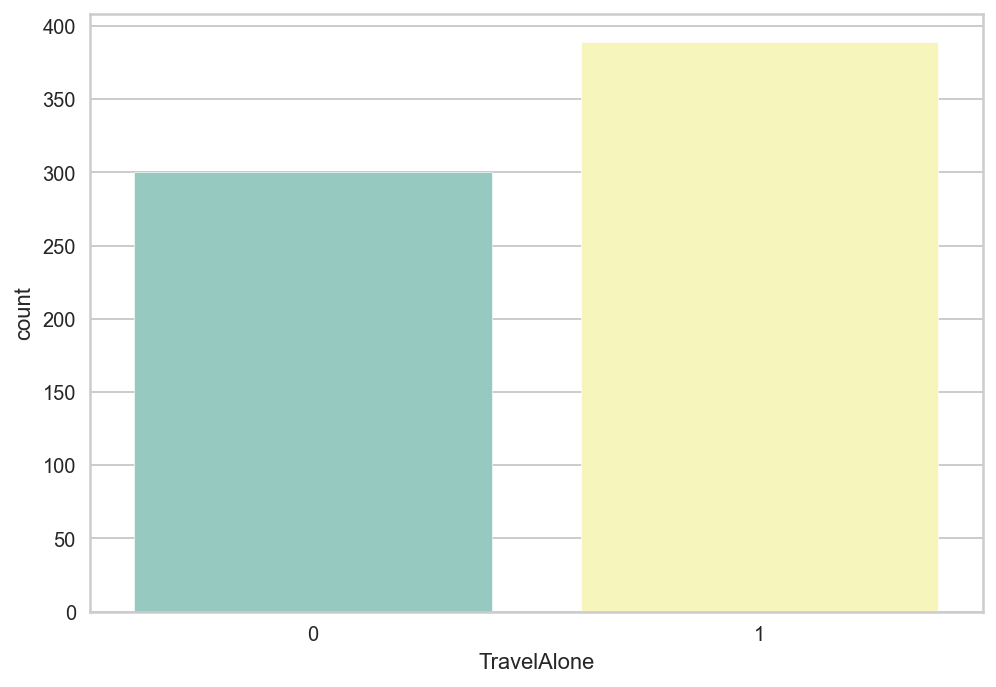

In [75]:
sns.countplot(train_data.TravelAlone,palette="Set3")
plt.show()

In cases where family size is small (family size = 1 or family size = 2), we can see that survival rate is higher than large families.

In the previous top lines, we saw the 2 columns which has more missing value,than I can filled Age column with using means. But in other column which name is Cabin, values has %78 missing.I filled missing values on Cabin column but  In this case I want to drop it out from the this dataset, because I didn't think to use this values for analysing.

In [76]:
prof = ProfileReport(train_data)
prof.to_file(output_file='summary.html')

## COLUMN DROPPING

In [77]:
#Cabin column eliminated because it has too much missing values
pd.get_dummies(train_data.Cabin, prefix="CBN", drop_first = True)
train_new=train_data.drop('Cabin',axis=1)


In [78]:
train_new.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare     Embarked Salutation Age_Status  \
0      0         A/5 21171   7.2500  Southampton         Mr      Adult   
1      0          PC 17599  71.2833    Cherbourg        Mrs      Adult   
2      0  STON/O2. 3101282   7.9250  Southampton       Miss      Adult   
3      0            113803  53.1000  Southampton        Mrs      Adult   
4      0            373450   8.0500  Southampton         Mr      Adult   

   FamilySize  TravelAlone  
0           2            0  
1           2            0  
2           1            1  
3           2            0  
4           1            1

In [79]:
pd.get_dummies(test_data.Cabin, prefix="CBN", drop_first = True)


CBN_A18  CBN_A21  CBN_A29  CBN_A34  CBN_A9  CBN_B10  CBN_B11  CBN_B24  \
0          0        0        0        0       0        0        0        0   
1          0        0        0        0       0        0        0        0   
2          0        0        0        0       0        0        0        0   
3          0        0        0        0       0        0        0        0   
4          0        0        0        0       0        0        0        0   
..       ...      ...      ...      ...     ...      ...      ...      ...   
413        0        0        0        0       0        0        0        0   
414        0        0        0        0       0        0        0        0   
415        0        0        0        0       0        0        0        0   
416        0        0        0        0       0        0        0        0   
417        0        0        0        0       0        0        0        0   

     CBN_B26  CBN_B36  ...  CBN_E52  CBN_E60  CBN_F  CBN_F E46  CBN_F E57  \
0          0        0  ...        0        0      0          0          0   
1          0        0  ...        0        0      0          0          0   
2          0        0  ...        0        0      0          0          0   
3          0        0  ...        0        0      0          0          0   
4          0        0  ...        0        0      0          0          0   
..       ...      ...  ...      ...      ...    ...        ...        ...   
413        0        0  ...        0        0      0          0          0   
414        0        0  ...        0        0      0          0          0   
415        0        0  ...        0        0      0          0          0   
416        0        0  ...        0        0      0          0          0   
417        0        0  ...        0        0      0          0          0   

     CBN_F G63  CBN_F2  CBN_F33  CBN_F4  CBN_G6  
0            0       0        0       0       0  
1            0       0        0       0       0  
2            0       0        0       0       0  
3            0       0        0       0       0  
4            0       0        0       0       0  
..         ...     ...      ...     ...     ...  
413          0       0        0       0       0  
414          0       0        0       0       0  
415          0       0        0       0       0  
416          0       0        0       0       0  
417          0       0        0       0       0  

[418 rows x 75 columns]

In [80]:
#GET DUMMIES+Dropping
sex = pd.get_dummies(train_new['Sex'],drop_first=True)
embark = pd.get_dummies(train_new['Embarked'],drop_first=True)
pesseengerId = pd.get_dummies(train_new['PassengerId'],drop_first=True)
ticket = pd.get_dummies(train_new['Ticket'],drop_first=True)
fare = pd.get_dummies(train_new['Fare'],drop_first=True)
name= pd.get_dummies(train_new['Name'],drop_first=True)

In [82]:
train_new.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare     Embarked Salutation Age_Status  \
0      0         A/5 21171   7.2500  Southampton         Mr      Adult   
1      0          PC 17599  71.2833    Cherbourg        Mrs      Adult   
2      0  STON/O2. 3101282   7.9250  Southampton       Miss      Adult   
3      0            113803  53.1000  Southampton        Mrs      Adult   
4      0            373450   8.0500  Southampton         Mr      Adult   

   FamilySize  TravelAlone  
0           2            0  
1           2            0  
2           1            1  
3           2            0  
4           1            1

In [83]:
train_new.drop(['PassengerId','Embarked','Name'],axis=1,inplace=True)

train_new.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Salutation Age_Status  FamilySize  TravelAlone  
0         Mr      Adult           2            0  
1        Mrs      Adult           2            0  
2       Miss      Adult           1            1  
3        Mrs      Adult           2            0  
4         Mr      Adult           1            1

In [84]:
#After we eliminate the Cabin and Embarked column datas and filling Age datas we can see via  graph that  is no null value in dataset

find_missing_data(train_data)

Total   Percent
Cabin          520  0.754717
TravelAlone      0  0.000000
FamilySize       0  0.000000
Age_Status       0  0.000000
Salutation       0  0.000000
Embarked         0  0.000000
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Age              0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000

<AxesSubplot:>

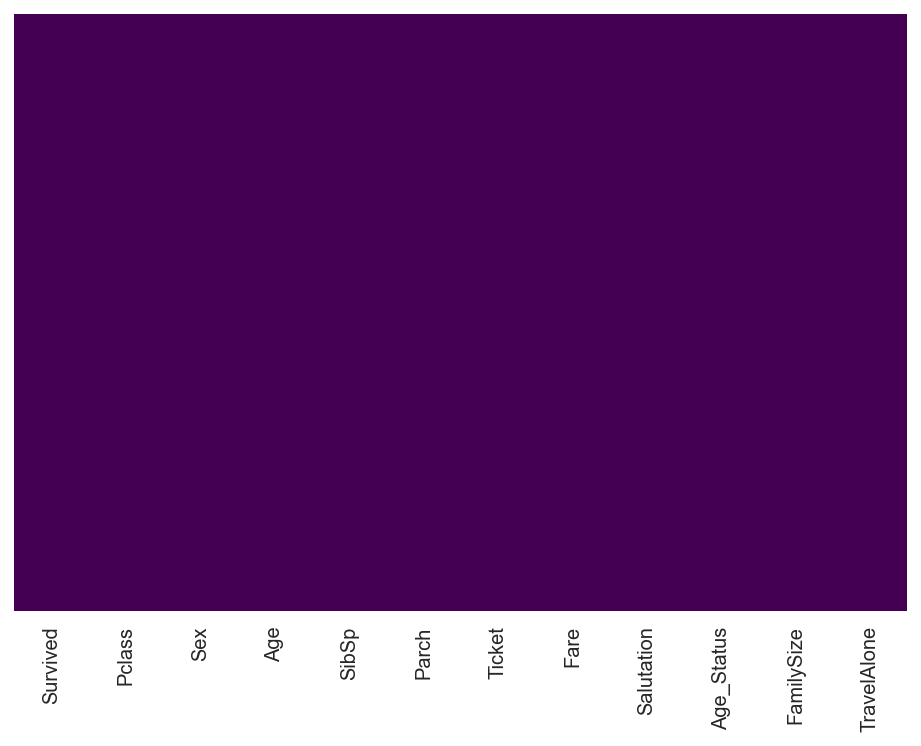

In [85]:
sns.heatmap(train_new.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

# Info about EDA
Missing Values checked.
Missig values filled with fillna-.
-Age-Survived
-Sex-Survived
-Pclass-Survived
-Parch-Survived
-Embarked-Survived 

#These columns relationships are checked with correlation and plots.

-Firstly Not necessary columns deleted as Cabin because it has lots of missing values.
Then PesseengerId,Sex,Embarked,Name,Ticket columns deleted after the dummies operations.

# ADDITIONAL FUTURE EXTRACTION FOR MODELLING AND CLASSIFICATION

train_new.corr()["Survived"]

In [92]:
train_new['Salutation_C']= train_new['Salutation'].copy()
salut_dict = {
    'Mrs':1,
    'Miss':2,
    'Mr':3,
    'Master':4,
    'Dr':5,
    'Mme':6,
    'Major':7,
    'Lady':8,
    'Sir':9,
    'Mlle':10,
    'Col':11,
    'the Countess':12
}

train_new = train_new.replace({"Salutation": salut_dict})




In [94]:
train_new['Age_Status_C']= train_new['Age_Status'].copy()
age_status_dict = {
    'Baby':1,
    'Little Children':2,
    'Children':3,
    'Adult':4,
    'Elder':5,
   
}

train_new = train_new.replace({"Age_Status": age_status_dict})
train_new.head(5)

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Salutation  Age_Status  FamilySize  TravelAlone Salutation_C Age_Status_C  
0          3           4           2            0            3        Adult  
1          1           4           2            0            1        Adult  
2          2           4           1            1            2        Adult  
3          1           4           2            0            1        Adult  
4          3           4           1            1            3        Adult

# CREATE MODEL FOR TRAINING

In [172]:
cols = ["Age","Fare","Pclass","SibSp","Parch","FamilySize","Salutation","Survived"] 
train_XY = train_new[cols]

train_XY = train_XY[train_XY.applymap(np.isreal).all(1)]
train_XY["Salutation"] = train_XY["Salutation"].astype(int)

In [174]:
cols = ["Age","Fare","Pclass","SibSp","Parch","FamilySize","Salutation"] 

X = train_XY[cols]
Y= train_XY['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify = train_XY['Survived'])
#x_train, x_test,=cols %80
# y_train, y_test= survived values%20


In [175]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(544, 7)
(136, 7)
(544,)
(136,)


In [176]:
# Build a logistic reggression and compute the feature importances
model = LogisticRegression()

In [177]:
# create the recursive feature elimination (RFE) model and select 7 attributes
#(RFE) is to select features by recursively considering smaller and smaller sets of features

rfe = RFE(model, 7)
rfe = rfe.fit(x_train, y_train)

In [178]:
# summarize the selection of the attributes
print('Selected features: %s' % list(x_train.columns[rfe.support_]))

Selected features: ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'FamilySize', 'Salutation']


Optimal number of features: 6
Selected features: ['Age', 'Pclass', 'SibSp', 'Parch', 'FamilySize', 'Salutation']


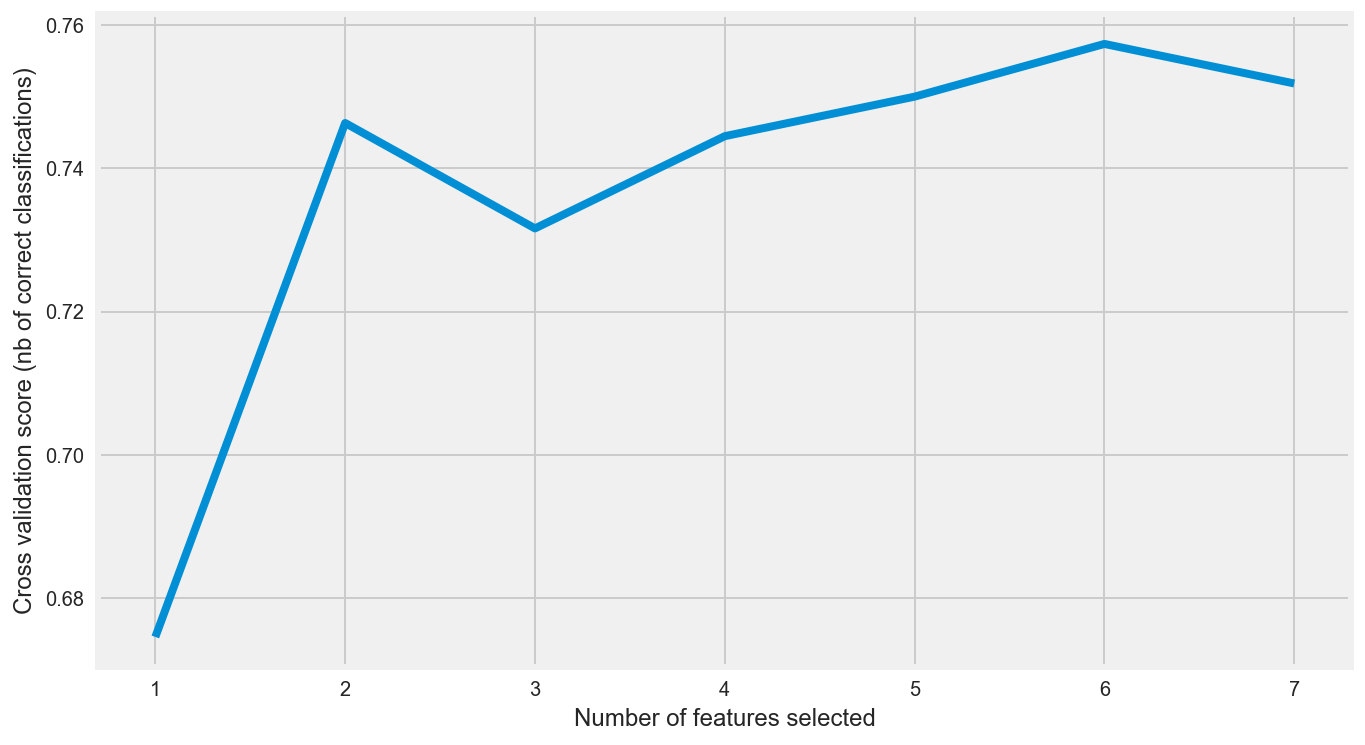

In [183]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=4, scoring='accuracy')
rfecv.fit(x_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(x_train.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

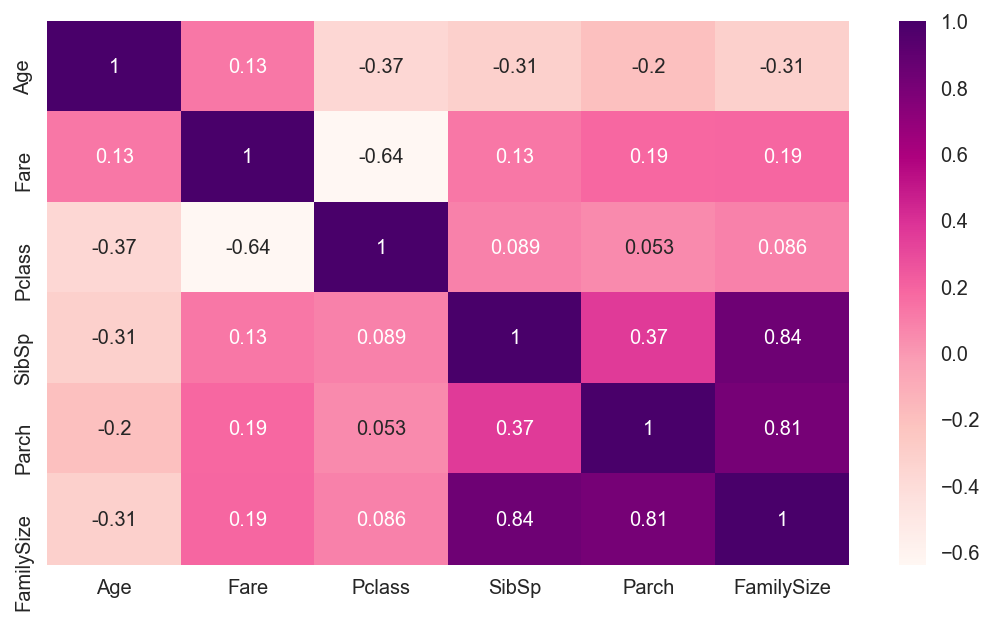

In [180]:
Selected_features = ["Age","Fare","Pclass","SibSp","Parch","FamilySize","Salutation"] 
X = train_new[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdPu")
plt.show()

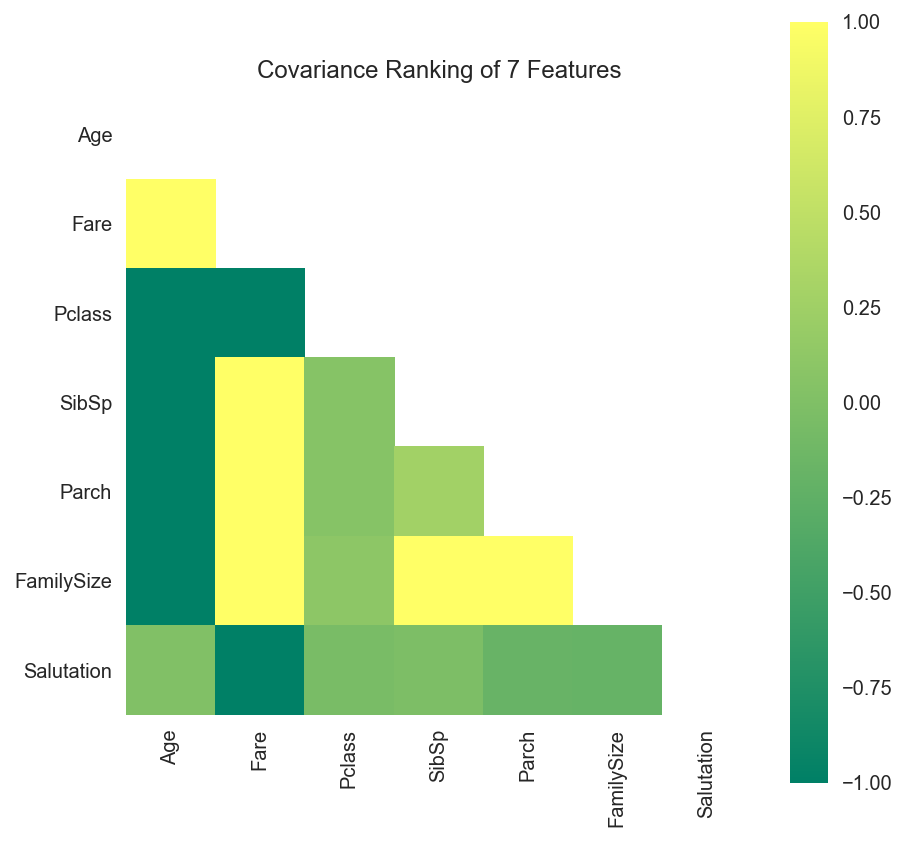

<AxesSubplot:title={'center':'Covariance Ranking of 7 Features'}>

In [105]:
from yellowbrick.features import Rank2D
figsize=(7, 7)
fig, ax = plt.subplots(figsize=figsize)
cols = ["Age","Fare","Pclass","SibSp","Parch","FamilySize","Salutation"] 
visualizer1 = Rank2D(features=cols, ax=ax, algorithm='covariance', colormap='summer')
visualizer2 = Rank2D(features=cols, algorithm='pearson')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

visualizer1.fit(x_train,y_train)
visualizer1.transform(x_train)
visualizer1.poof()
#A high covariance basically indicates there is a strong relationship between the variables. A low value means there is a weak relationship.

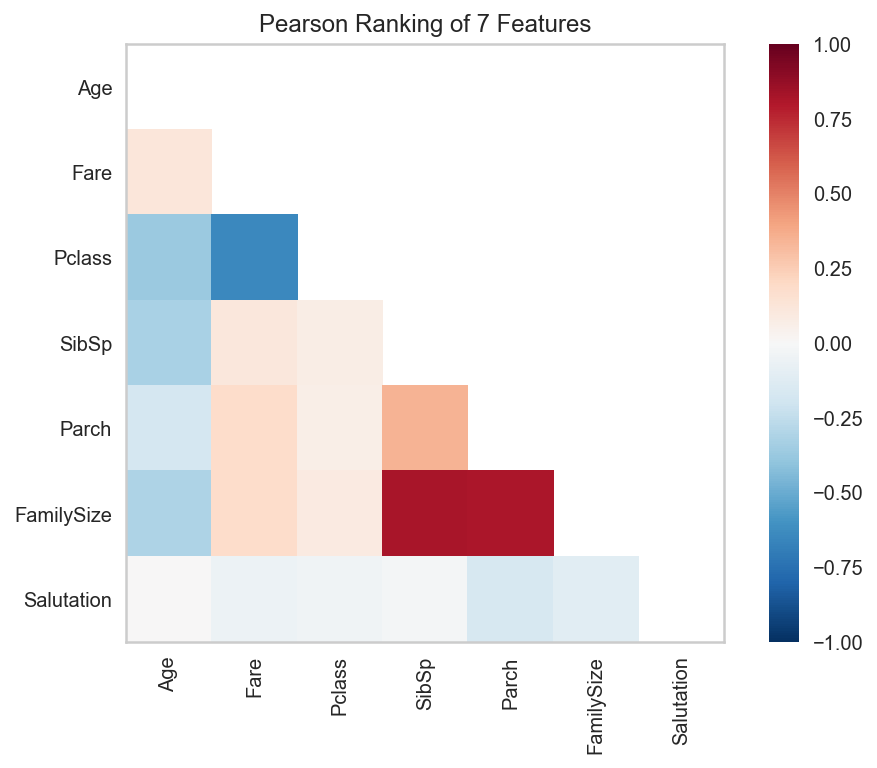

<AxesSubplot:title={'center':'Pearson Ranking of 7 Features'}>

In [106]:
visualizer2.fit(x_train,y_train)
visualizer2.transform(x_train)
visualizer2.poof()
#An r of -1 indicates a perfect negative linear relationship between variables, 
#an r of 0 indicates no linear relationship between variables,
#and an r of 1 indicates a perfect positive linear relationship between variables. .

## TRAIN THE TITANIC DATA

## LOGISTIC REGRESSION

In [107]:
log_reg_mnm = LogisticRegression()
log_reg_mnm.fit(x_train, y_train)
train_accuracy = log_reg_mnm.score(x_train, y_train)
test_accuracy = log_reg_mnm.score(x_test, y_test)
print('Logistic Regression :', '-'*20, 
      'Logistic Regression Train Accurracy : {:.2f}'.format(train_accuracy), 
      'Logistic Regression Test Accurracy  : {:.2f}'.format(test_accuracy), sep='\n')

Logistic Regression :
--------------------
Logistic Regression Train Accurracy : 0.76
Logistic Regression Test Accurracy  : 0.76


LogisticRegression auc is  : 0.816 



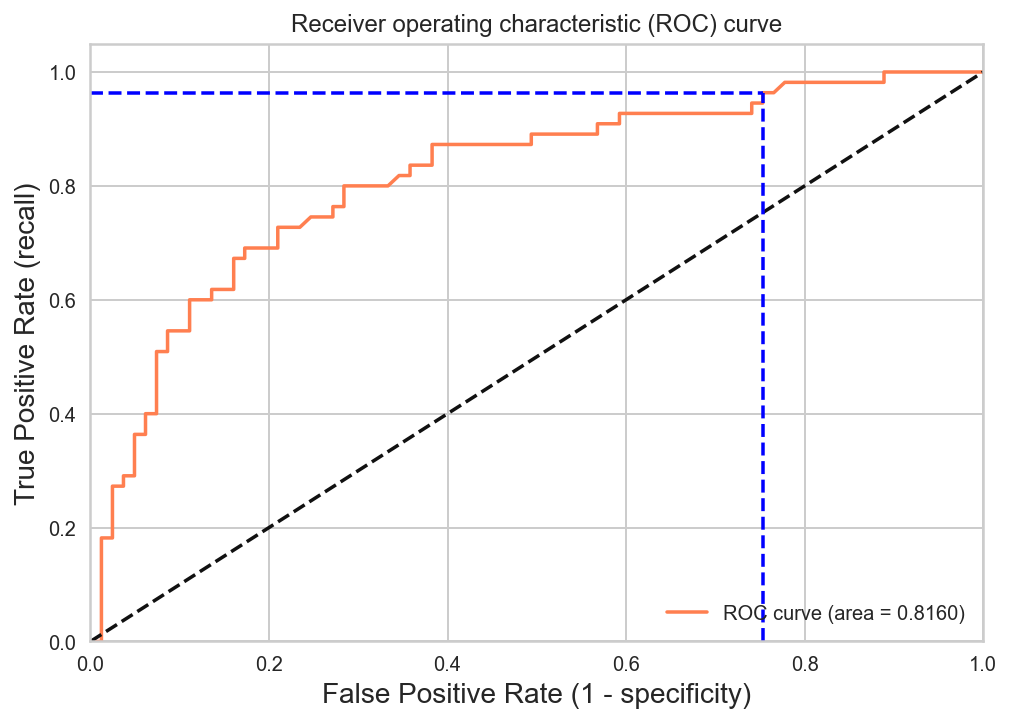

In [108]:
y_pred_proba = log_reg_mnm.predict_proba(x_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print(log_reg_mnm.__class__.__name__+" auc is  : %2.3f \n" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.4f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#PRECISON(doğru diye tahmin ettiklerinin ne kadar doğru olduğu) RECALL(geçekte doğru olanların ne kadarını doğru bilmiş)a göre çiziliyor
#altında kalan alan büyükse 1 =1 ve 0 =0 ları dopru tahmin ediyor diyebiliriz.

In [109]:
log_reg = LogisticRegression()

print(log_reg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [110]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1'],
               "solver" : ["liblinear"]
             }
#lasso liblinear
tuning= pd.DataFrame(columns=["C","Penalty","Score"])

grid_cv= GridSearchCV(estimator=LogisticRegression(),
    param_grid=parameters,
    cv=5
    )

grid_cv.fit(x_train, y_train)
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)
    
c= grid_cv.best_params_['C']
penalty=grid_cv.best_params_['penalty']
score=grid_cv.best_score_
tuning=tuning.append({"C":c,"Penalty":penalty, "Score":score},ignore_index=True)

display(tuning)

#GridSearch= önceden belirlenen parametrelerle modelin train sete daha uygun olmasını sağlıyor ve böylece best parametre seçilir.

Best Parameters :  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score      :  0.7463302752293578


C Penalty    Score
0  100      l1  0.74633

import pandas as pd

results = grid_cv.cv_results_

df = pd.DataFrame(results)
display(df.head().iloc[:,:6])


df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

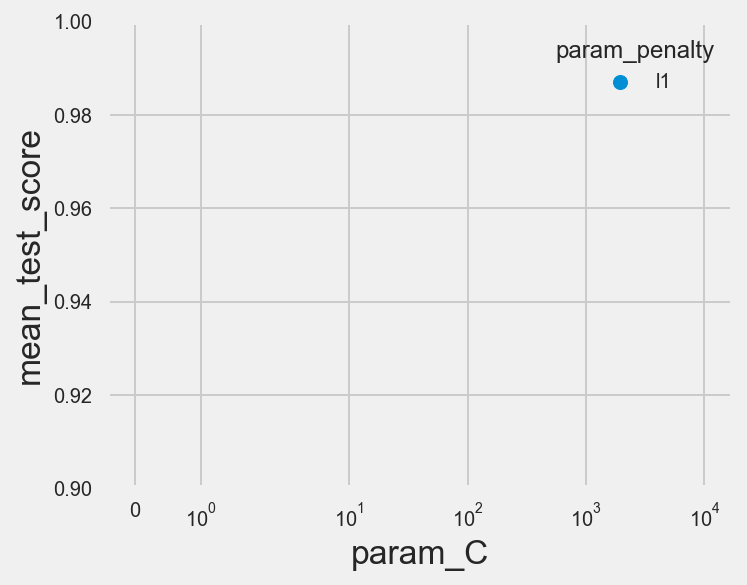

In [113]:
#We can examine the 10 most successful combinations of parameters on a graph.

plt.style.use('fivethirtyeight')
plt.figure(figsize=(5,4))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=200)
plt.xscale('symlog')
plt.ylim((0.9,1))

plt.show()



In [115]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, x_train, y_train, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, x_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, x_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:', '-'*35, sep='\n')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
-----------------------------------
LogisticRegression average accuracy is 0.750
LogisticRegression average log_loss is 0.574
LogisticRegression average auc is 0.778


https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6

https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

##  Stochastic Gradient Descent (SGD)

In [116]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)


## Random Forest

In [117]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

## KNN 

In [118]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  
Y_pred = knn.predict(x_test)  
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

## Gaussian Naive Bayes

In [119]:

gaussian = GaussianNB()
gaussian.fit(x_train, y_train) 
Y_pred = gaussian.predict(x_test)  
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

## Perceptron

In [120]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)

## Linear Support Vector Machine

In [121]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

## Decision Tree

In [122]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

## XGBOOST

In [123]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgboost_score= xgb.score(x_train, y_train)


## Logistic Regression

In [124]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

## Which is the Best Training Model ?

In [125]:
results = pd.DataFrame({
    'Train Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, xgboost_score*100,
              acc_sgd, acc_decision_tree],
     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'XGBOOST',
              'Stochastic Gradient Decent', 
              'Decision Tree']})
result_df = results.sort_values(by='Train Score', ascending=False)
result_df = result_df.set_index('Train Score')
result_df.head(9)

Model
Train Score                            
99.260000                 Random Forest
99.260000                 Decision Tree
97.426471                       XGBOOST
83.460000                           KNN
75.550000           Logistic Regression
71.140000                   Naive Bayes
70.040000       Support Vector Machines
64.340000                    Perceptron
61.030000    Stochastic Gradient Decent

# LET'S DEEPLY LEARN MODELS

## LOGISTIC REGRESSION
#  TRAIN RESULTS

In [126]:
from sklearn.metrics import plot_confusion_matrix


LOGISTIC REGRESSION :
Accuracy: 75.55
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       322
           1       0.74      0.61      0.67       222

    accuracy                           0.76       544
   macro avg       0.75      0.73      0.74       544
weighted avg       0.75      0.76      0.75       544

Confusion Matrix:


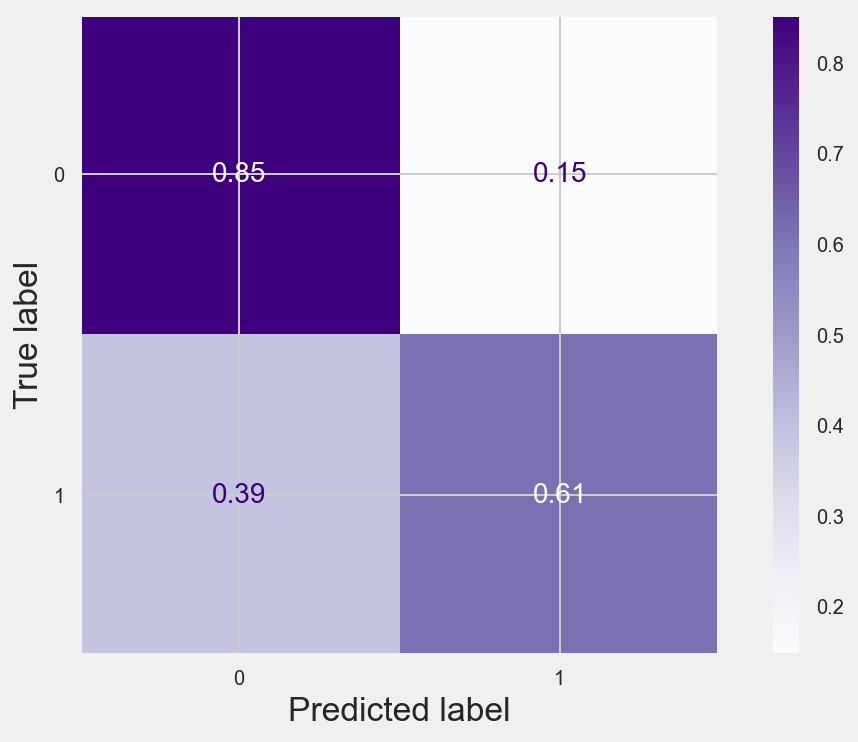

In [127]:
print('\nLOGISTIC REGRESSION :')
predictions = logreg.predict(x_train)
accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(logreg,x_train, y_train, cmap=plt.cm.Purples, normalize='true')
plt.show()
#0'ları 0 olarak %85 şekilde dogru tahmin etmiş. Ancak doğruları tahmin etmek konusunda çünkü 1 olan değerlere 0 deme oranı %15.

#  TEST RESULTS

Accuracy: 75.74
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        81
           1       0.75      0.60      0.67        55

    accuracy                           0.76       136
   macro avg       0.76      0.73      0.74       136
weighted avg       0.76      0.76      0.75       136

Confusion Matrix:


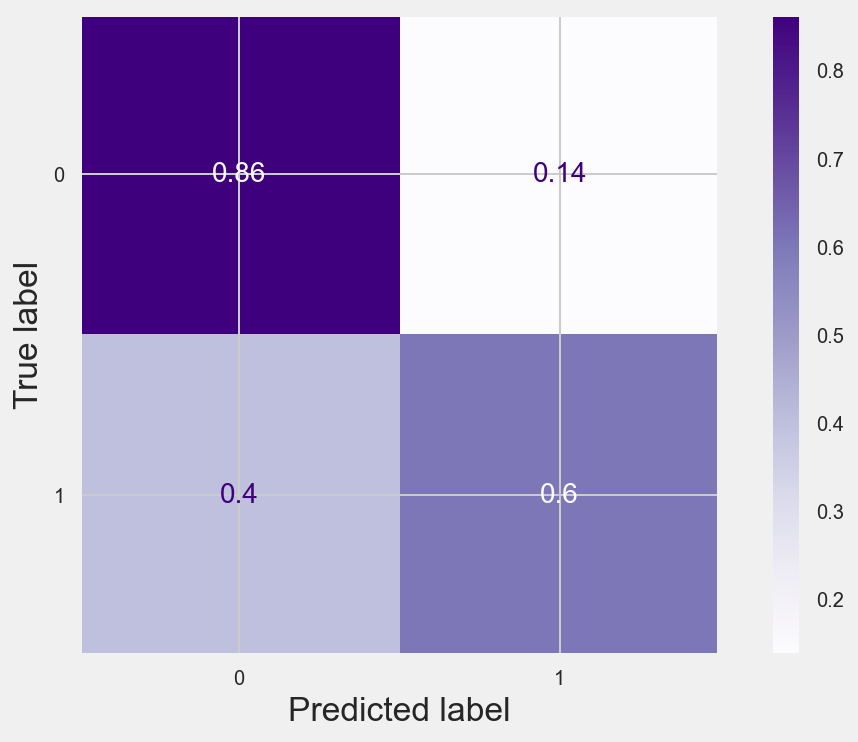

In [128]:
predictions = logreg.predict(x_test)
log_reg_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(log_reg_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(logreg,x_test, y_test, cmap=plt.cm.Purples, normalize='true')
plt.show()

## Stochastic Gradient Descent (SGD)
#  TRAIN RESULTS


Stochastic Gradient Descent (SGD) :
Accuracy: 61.03
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.98      0.75       322
           1       0.75      0.07      0.12       222

    accuracy                           0.61       544
   macro avg       0.68      0.53      0.44       544
weighted avg       0.66      0.61      0.49       544

Confusion Matrix:


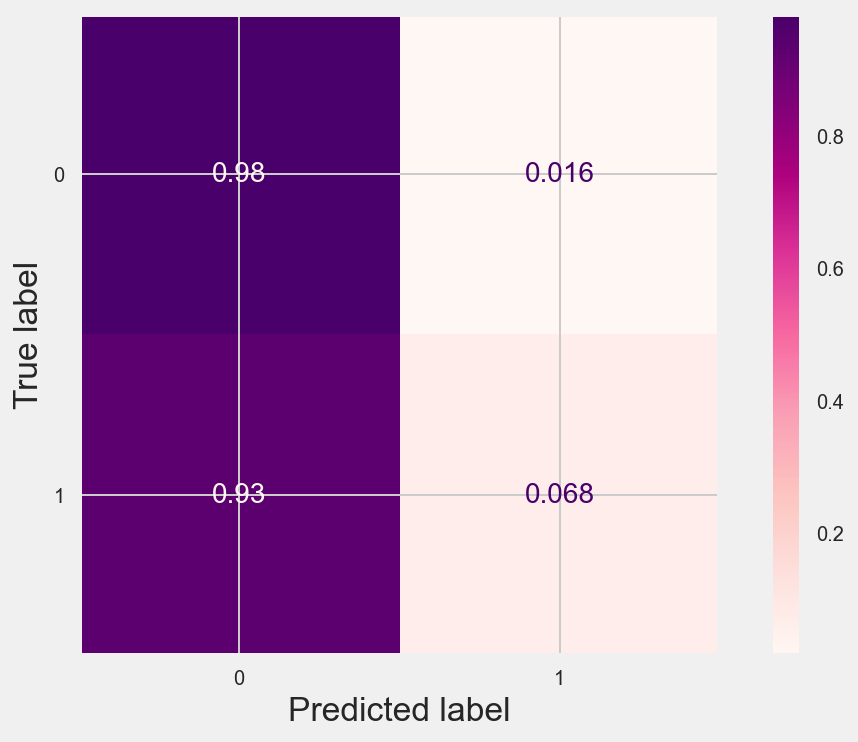

In [129]:
from sklearn.metrics import plot_confusion_matrix
print('\nStochastic Gradient Descent (SGD) :')
predictions = sgd.predict(x_train)
accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(sgd,x_train, y_train, cmap=plt.cm.RdPu, normalize='true')
plt.show()

# TEST RESULTS


Stochastic Gradient Descent (SGD) :
Accuracy: 59.56
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.99      0.74        81
           1       0.50      0.02      0.04        55

    accuracy                           0.60       136
   macro avg       0.55      0.50      0.39       136
weighted avg       0.56      0.60      0.46       136

Confusion Matrix:


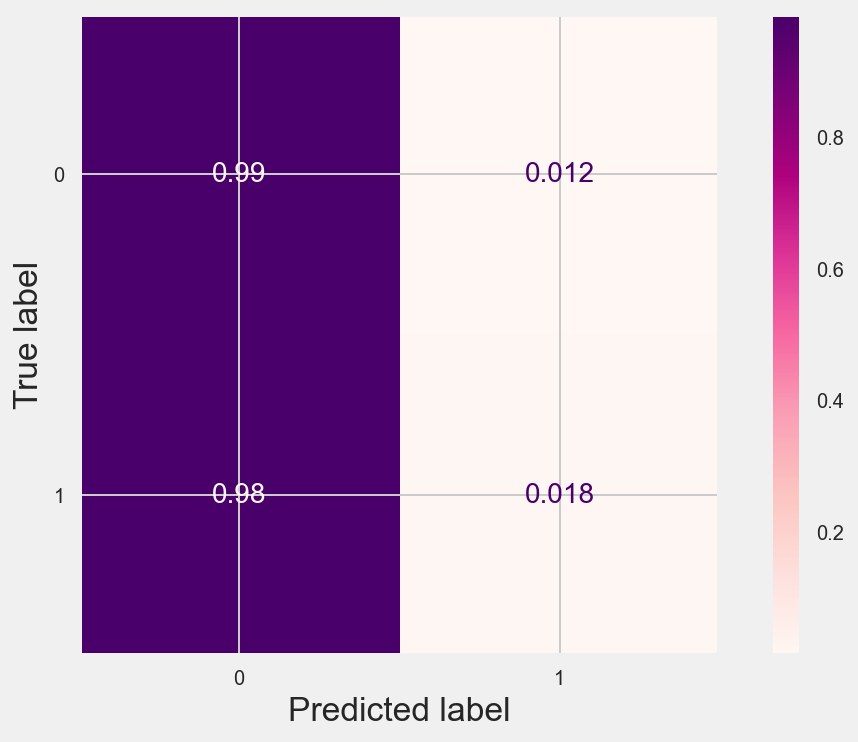

In [130]:
print('\nStochastic Gradient Descent (SGD) :')
predictions = sgd.predict(x_test)
sgd_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(sgd_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(sgd,x_test, y_test, cmap=plt.cm.RdPu, normalize='true')
plt.show()

# K-NEAREST NEIGHBOUR (KNN)
## TRAIN RESULTS



K-NEAREST NEIGHBOUR (KNN) :
Accuracy: 83.46
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       322
           1       0.84      0.74      0.78       222

    accuracy                           0.83       544
   macro avg       0.84      0.82      0.83       544
weighted avg       0.83      0.83      0.83       544

Confusion Matrix:


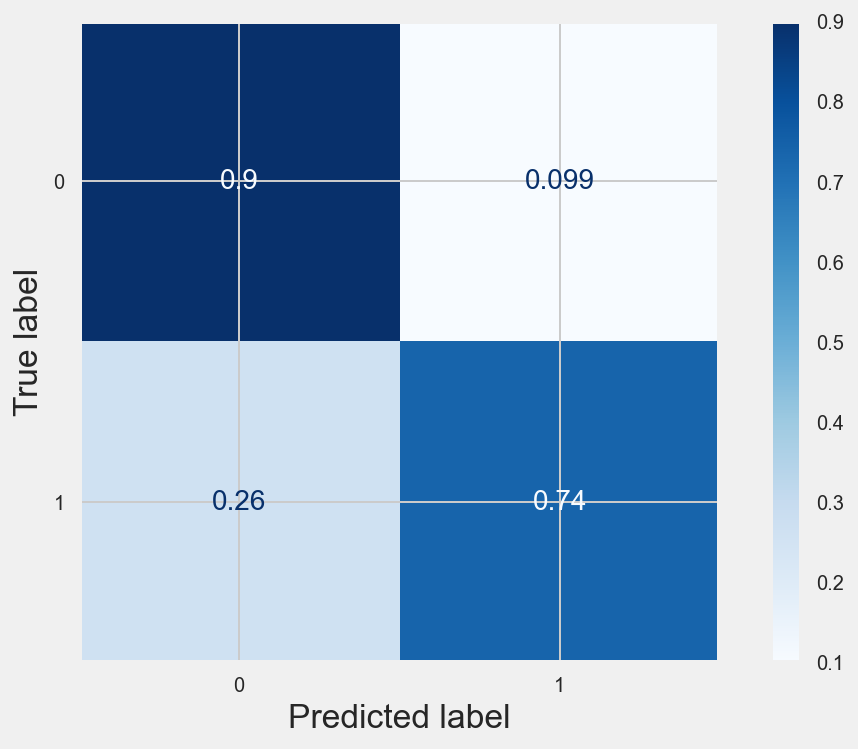

In [131]:
from sklearn.metrics import plot_confusion_matrix
print('\nK-NEAREST NEIGHBOUR (KNN) :')
predictions = knn.predict(x_train)
accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(knn,x_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()

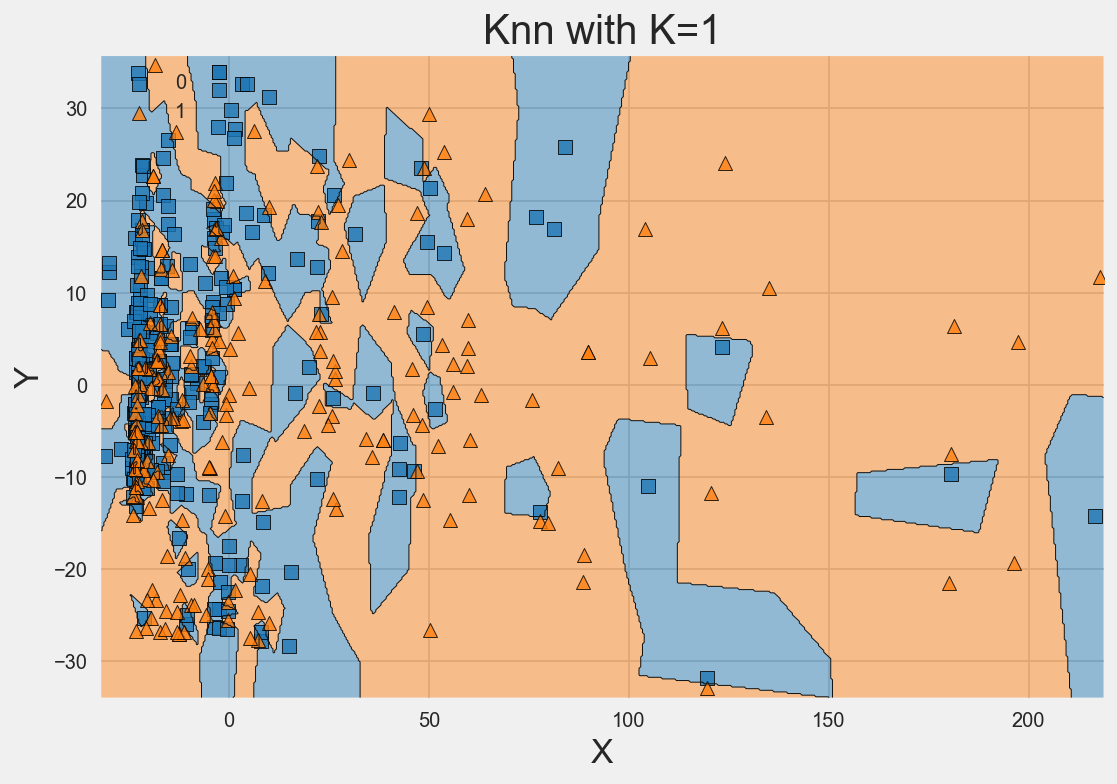

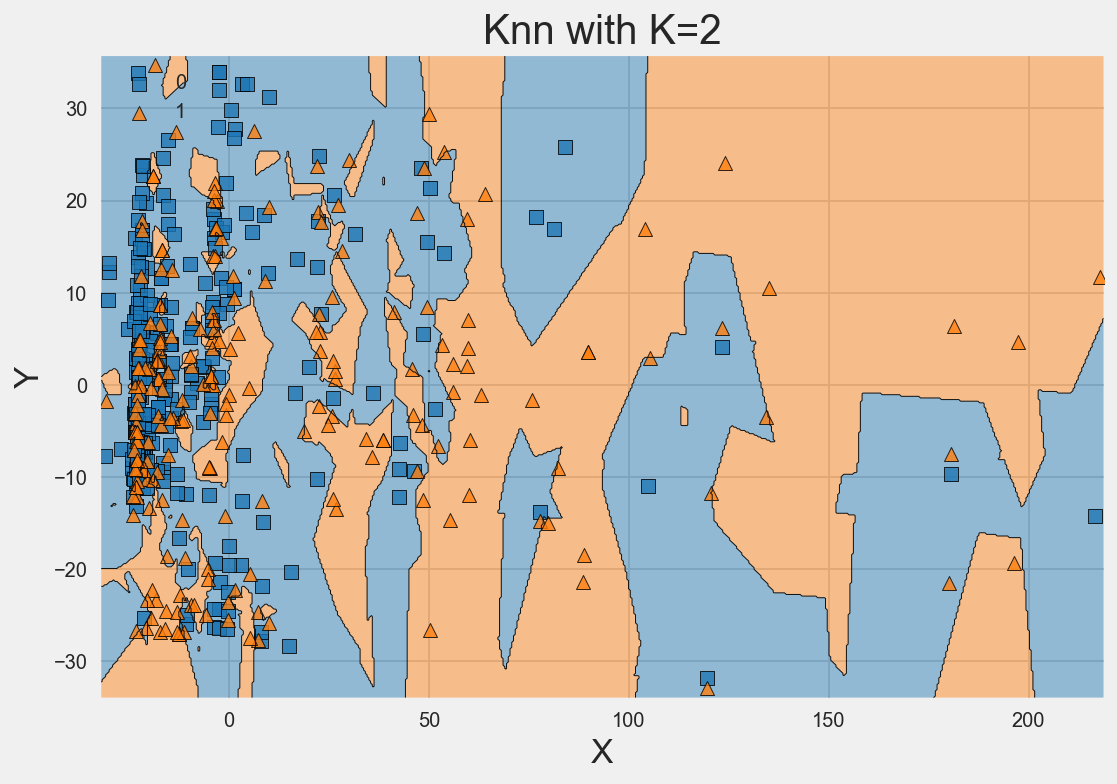

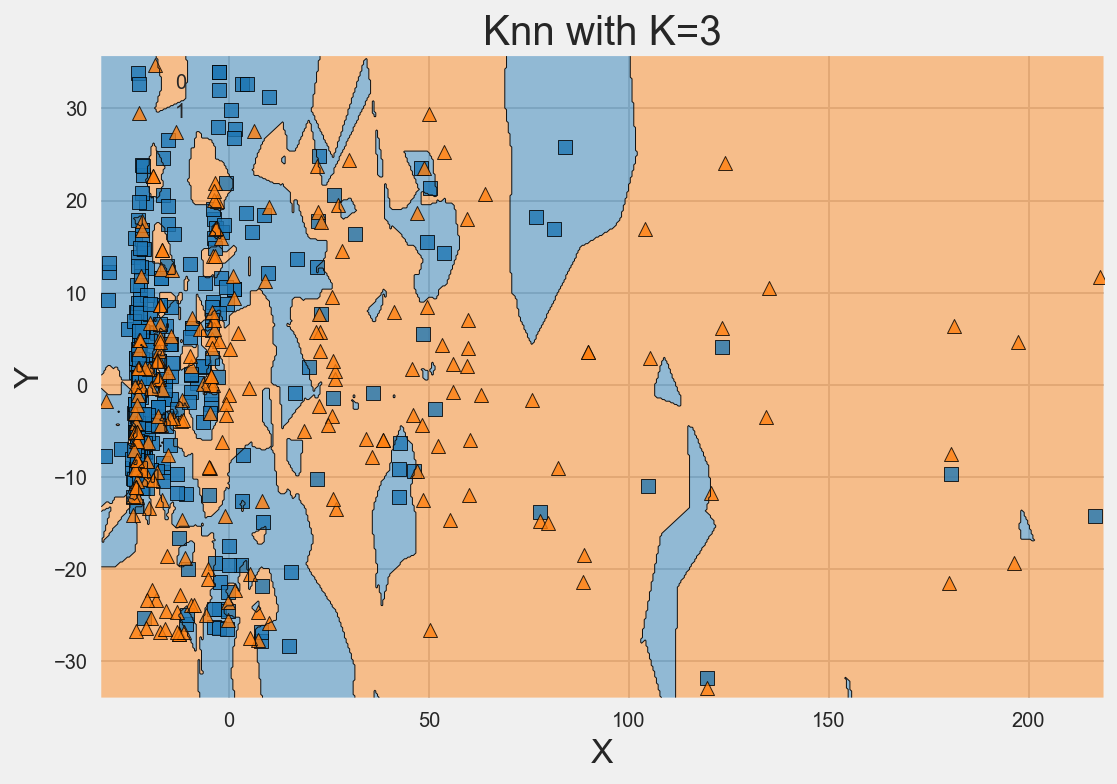

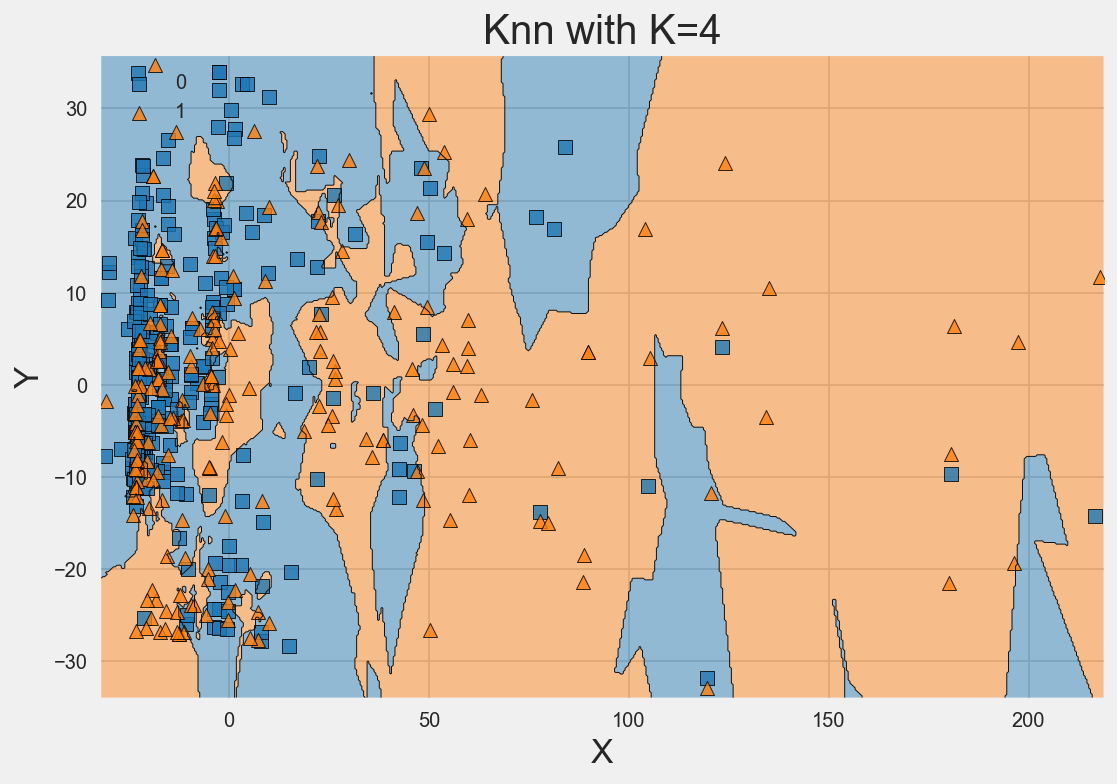

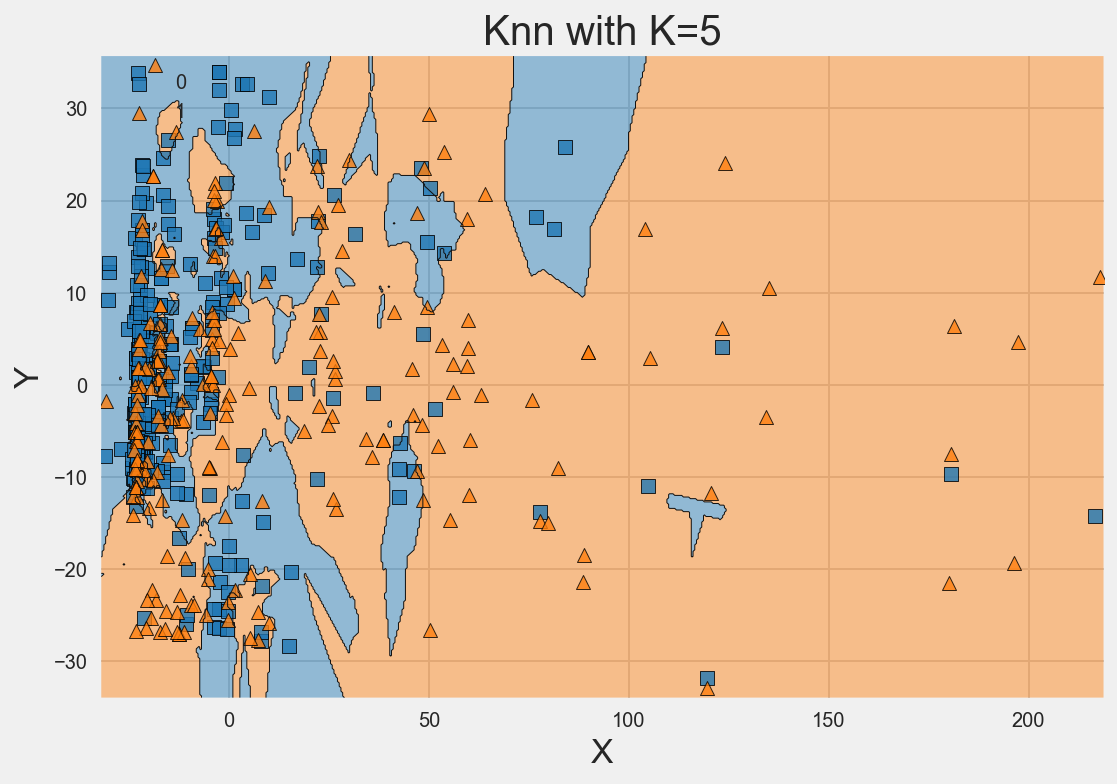

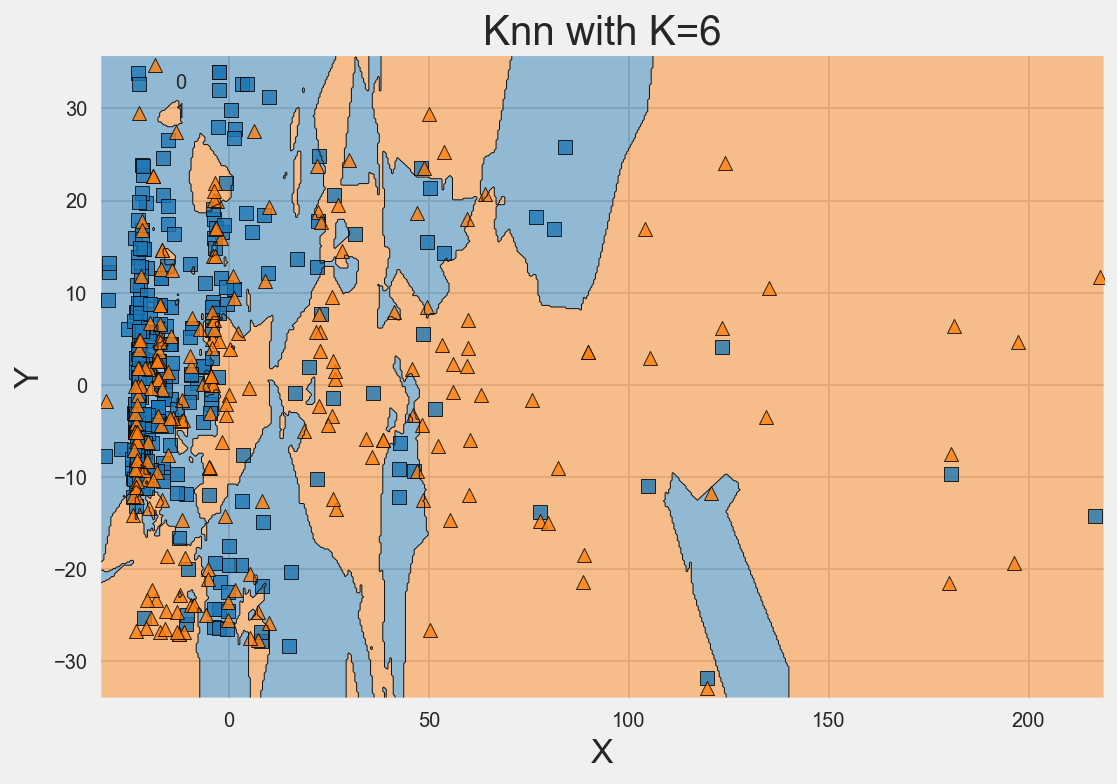

In [132]:
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def knn_comparison(k):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    pca = PCA(n_components = 2)
    x_train2 = pca.fit_transform(x_train)
    clf.fit(x_train2, y_train)
    # Plotting decision region
    plot_decision_regions(x_train2, y_train.to_numpy(), clf=clf, legend=2)

    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))

    plt.show()

for i in [1,2,3,4,5,6]:
    knn_comparison(i)

# K-NEAREST NEIGHBOUR (KNN)
##  TEST RESULTS


K-NEAREST NEIGHBOUR (KNN) :
Accuracy: 68.38
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74        81
           1       0.61      0.60      0.61        55

    accuracy                           0.68       136
   macro avg       0.67      0.67      0.67       136
weighted avg       0.68      0.68      0.68       136

Confusion Matrix:


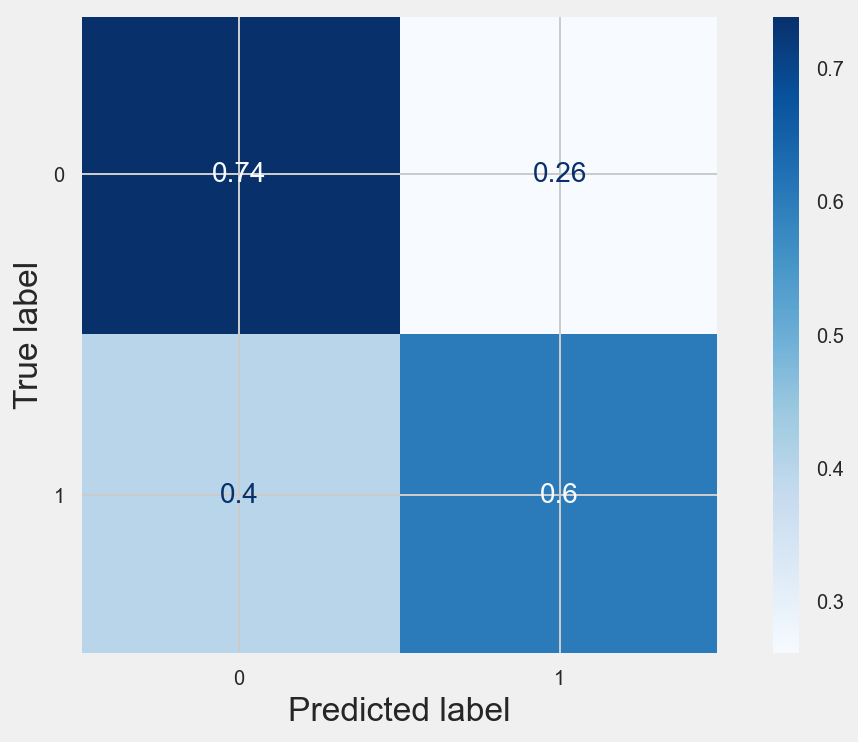

In [133]:
print('\nK-NEAREST NEIGHBOUR (KNN) :')
predictions = knn.predict(x_test)
knn_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(knn_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(knn,x_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()

# GAUSIIAN 
##  TRAIN RESULTS


 GAUSIIAN : 
Accuracy: 71.14
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       322
           1       0.69      0.54      0.60       222

    accuracy                           0.71       544
   macro avg       0.71      0.68      0.69       544
weighted avg       0.71      0.71      0.70       544

Confusion Matrix:


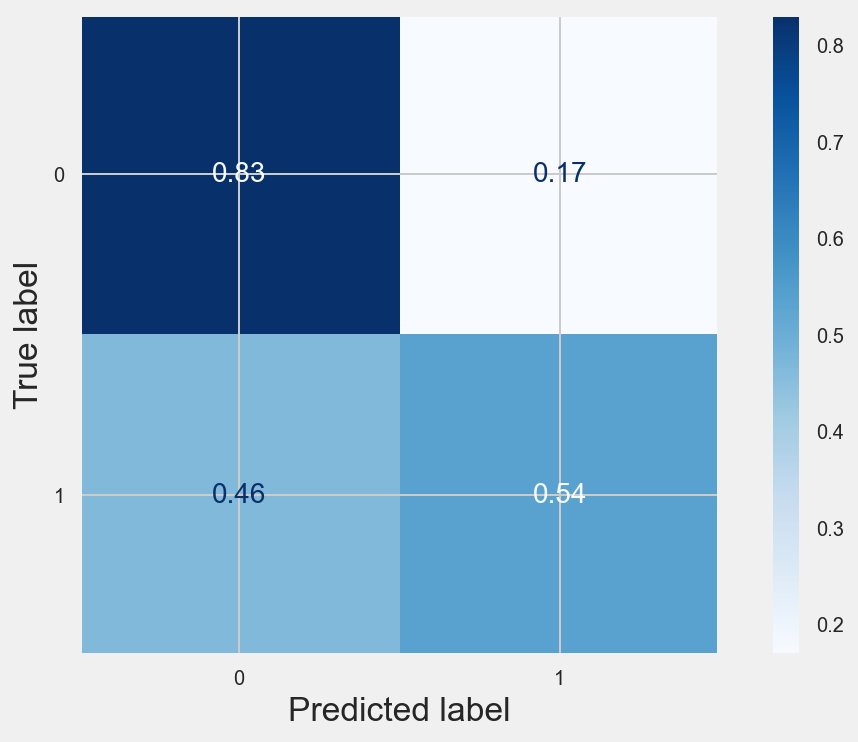

In [134]:
print('\n GAUSIIAN : ')
predictions = gaussian.predict(x_train)
accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(gaussian,x_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()

# GAUSIIAN 
## TEST RESULTS


 GAUSIIAN : 
Accuracy: 78.68
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        81
           1       0.78      0.65      0.71        55

    accuracy                           0.79       136
   macro avg       0.79      0.77      0.77       136
weighted avg       0.79      0.79      0.78       136

Confusion Matrix:


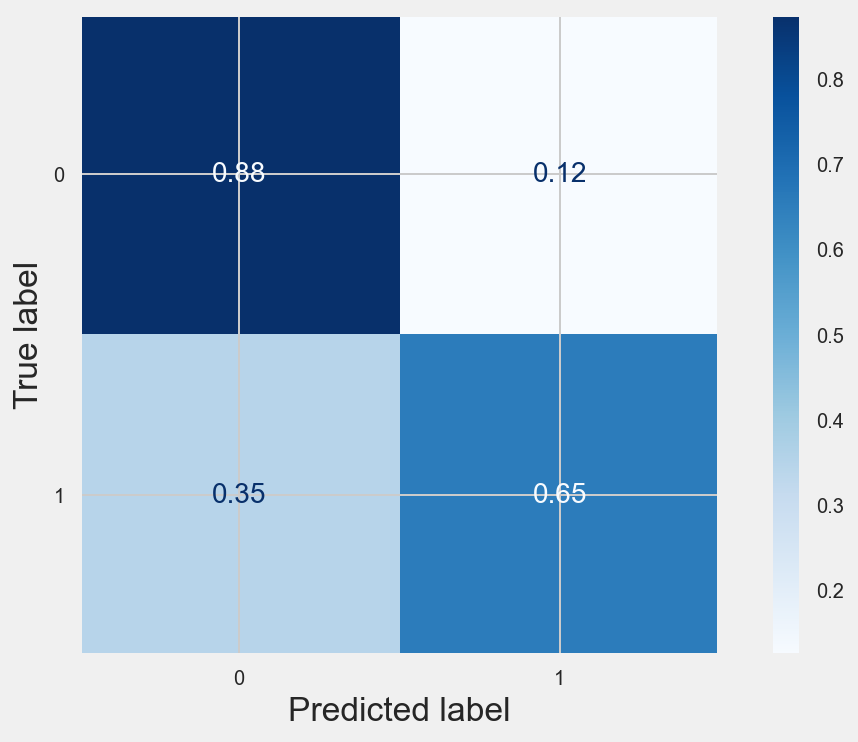

In [135]:
print('\n GAUSIIAN : ')
predictions = gaussian.predict(x_test)
gauss_knn_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(gauss_knn_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(gaussian,x_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()

# PERCEPTRON
##  TRAIN RESULTS


PERCEPTRON :
Accuracy: 64.34
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.97      0.76       322
           1       0.79      0.17      0.28       222

    accuracy                           0.64       544
   macro avg       0.71      0.57      0.52       544
weighted avg       0.70      0.64      0.57       544

Confusion Matrix:


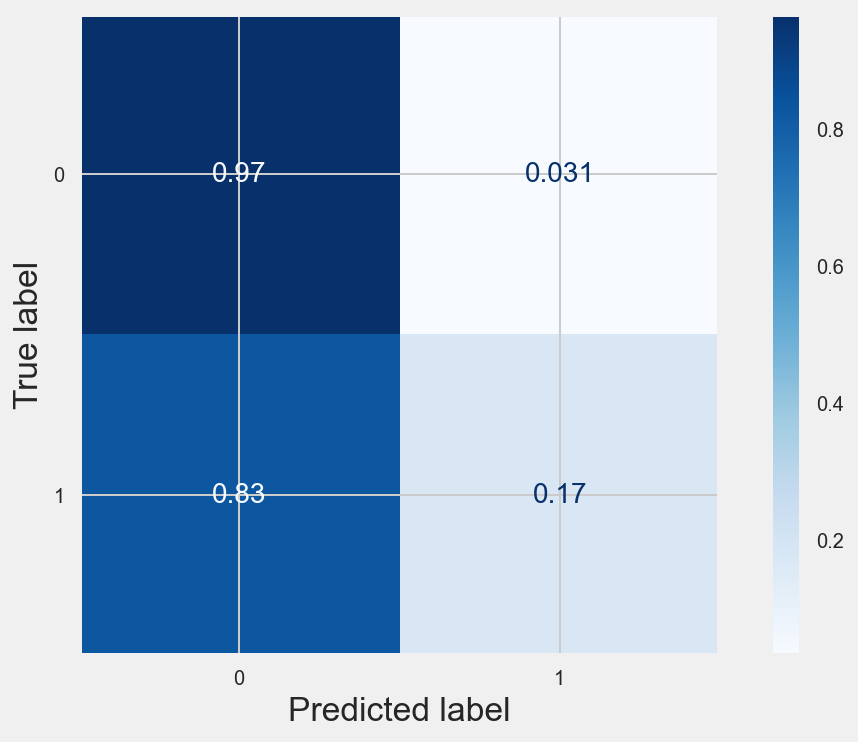

[[312  10]
 [184  38]]


In [136]:
print('\nPERCEPTRON :')
predictions = perceptron.predict(x_train)
accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(perceptron,x_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()
print(sklearn.metrics.confusion_matrix(y_train, predictions))


# PERCEPTRON
##  TEST RESULTS


PERCEPTRON :
Accuracy: 64.71
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77        81
           1       0.82      0.16      0.27        55

    accuracy                           0.65       136
   macro avg       0.73      0.57      0.52       136
weighted avg       0.71      0.65      0.57       136

Confusion Matrix:


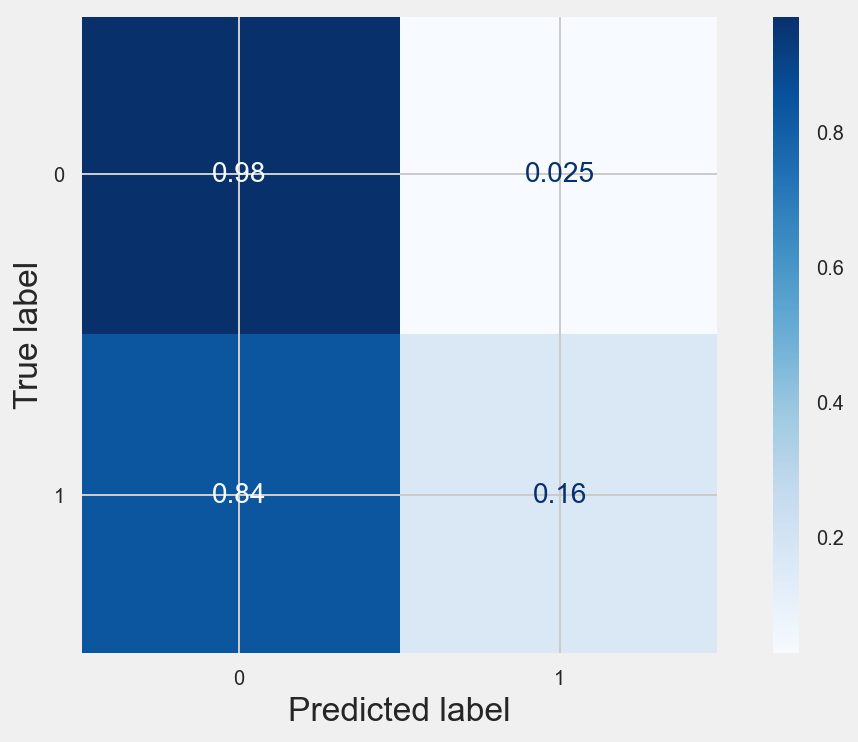

[[79  2]
 [46  9]]


In [137]:
print('\nPERCEPTRON :')
predictions = perceptron.predict(x_test)
perceptron_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(perceptron_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(perceptron,x_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()
print(sklearn.metrics.confusion_matrix(y_test, predictions))

#  Linear Support Vector Machine
## TRAIN RESULTS


 Linear Support Vector Machine :
Accuracy: 70.04
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79       322
           1       0.88      0.31      0.45       222

    accuracy                           0.70       544
   macro avg       0.78      0.64      0.62       544
weighted avg       0.76      0.70      0.66       544

Confusion Matrix:


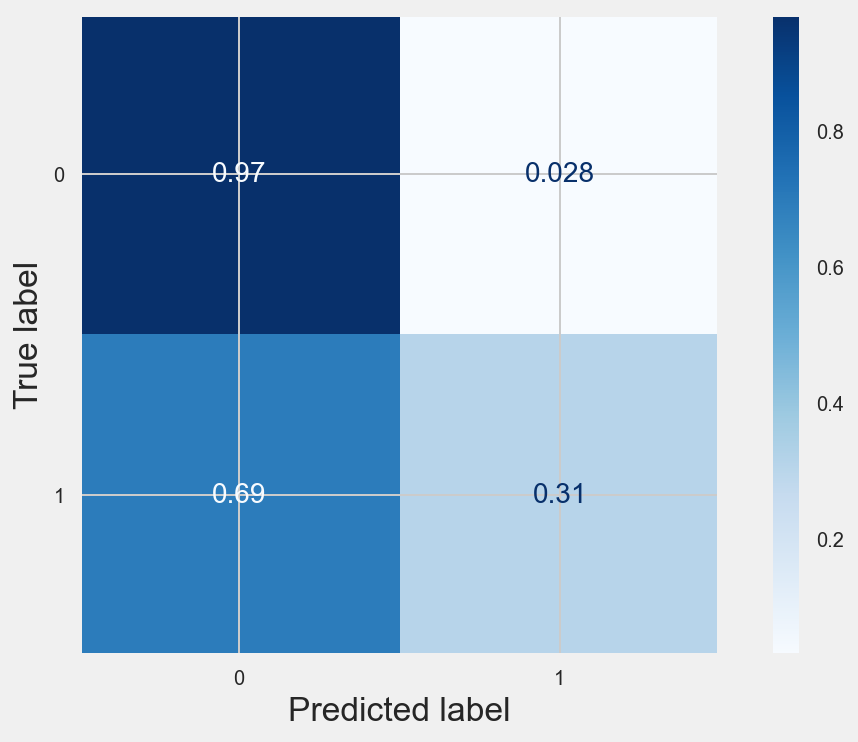

In [138]:
print('\n Linear Support Vector Machine :')
predictions = linear_svc.predict(x_train)
accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(linear_svc,x_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()

#  Linear Support Vector Machine
##  TEST RESULTS


 Linear Support Vector Machine :
Accuracy: 70.59
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.96      0.80        81
           1       0.86      0.33      0.47        55

    accuracy                           0.71       136
   macro avg       0.77      0.65      0.63       136
weighted avg       0.75      0.71      0.67       136

Confusion Matrix:


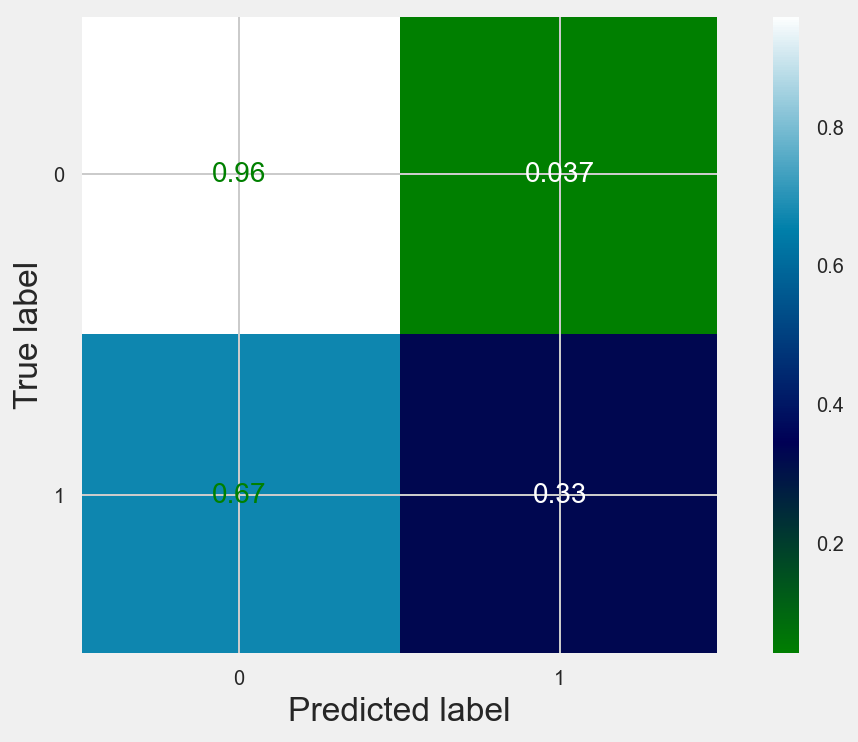

In [139]:
print('\n Linear Support Vector Machine :')
predictions = linear_svc.predict(x_test)
linear_support_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(linear_support_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(linear_svc,x_test, y_test, cmap=plt.cm.ocean, normalize='true')
plt.show()

# DECISION TREE
## TRAIIN RESULTS


 DECISION TREE :
Accuracy: 99.26
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       322
           1       1.00      0.98      0.99       222

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544

Confusion Matrix:


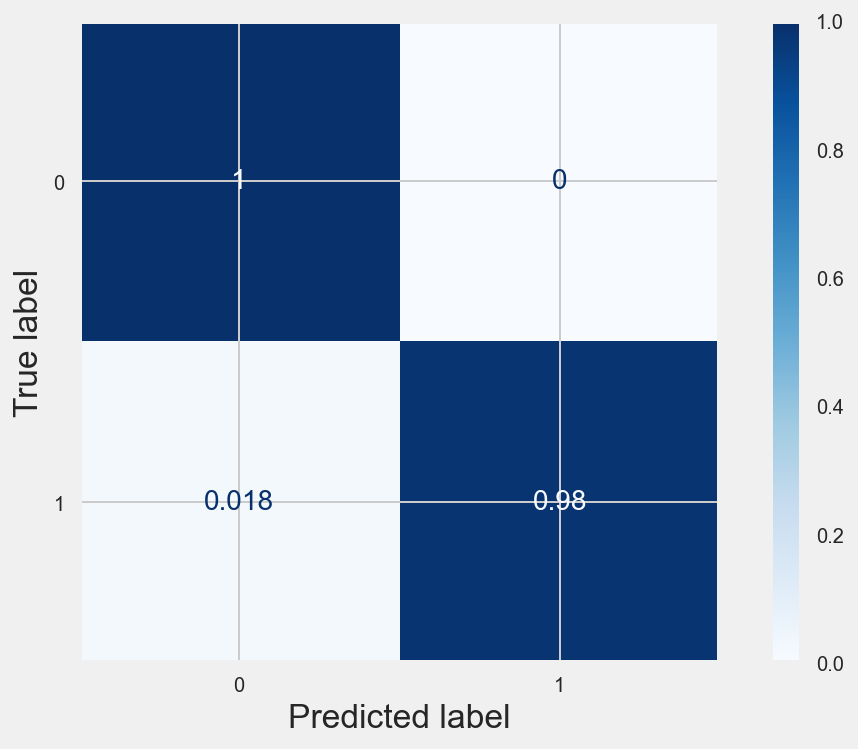

In [140]:
print('\n DECISION TREE :')
predictions = decision_tree.predict(x_train)
accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(decision_tree,x_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()


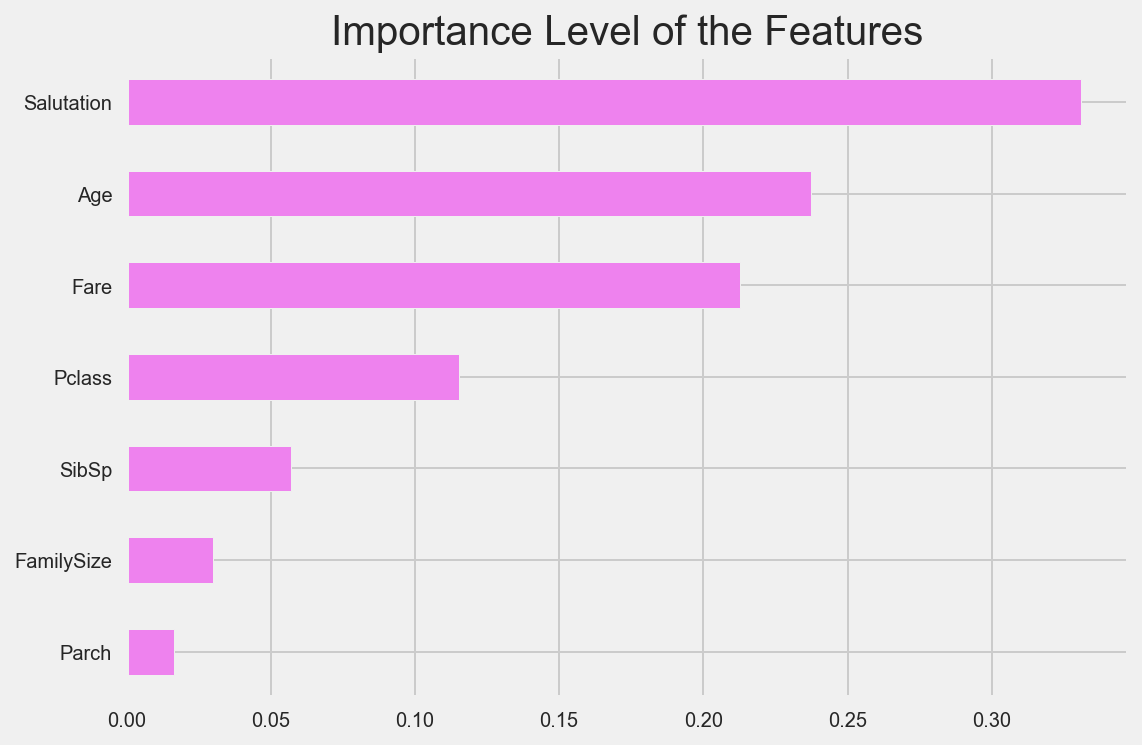

In [141]:
importance_level = pd.Series(data=decision_tree.feature_importances_,
                        index= x_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='Violet')
plt.title('Importance Level of the Features')
plt.show()

#  DECISION TREE
## TEST RESULTS


 DECISION TREE :
Accuracy: 76.47
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        81
           1       0.68      0.80      0.73        55

    accuracy                           0.76       136
   macro avg       0.76      0.77      0.76       136
weighted avg       0.78      0.76      0.77       136

Confusion Matrix:


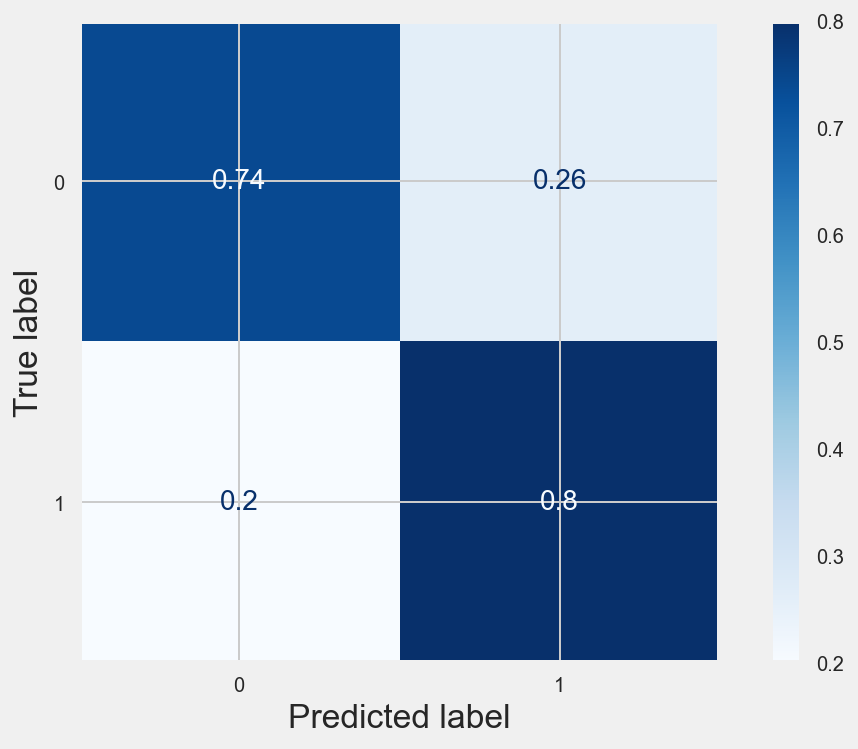

In [142]:
print('\n DECISION TREE :')
predictions = decision_tree.predict(x_test)
decision_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(decision_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(decision_tree,x_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()


# DECISION TREE REPRESENTATION

In [143]:
from IPython.core.display import display, HTML

cols = ["Age","Fare","Pclass","SibSp","Parch","FamilySize","Salutation"] 
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(decision_tree, x_train, y_train,
                target_name="Survived",
                feature_names=cols,
                class_names = list(y_train.unique()))
viz

viz.save("decision_tree.svg")

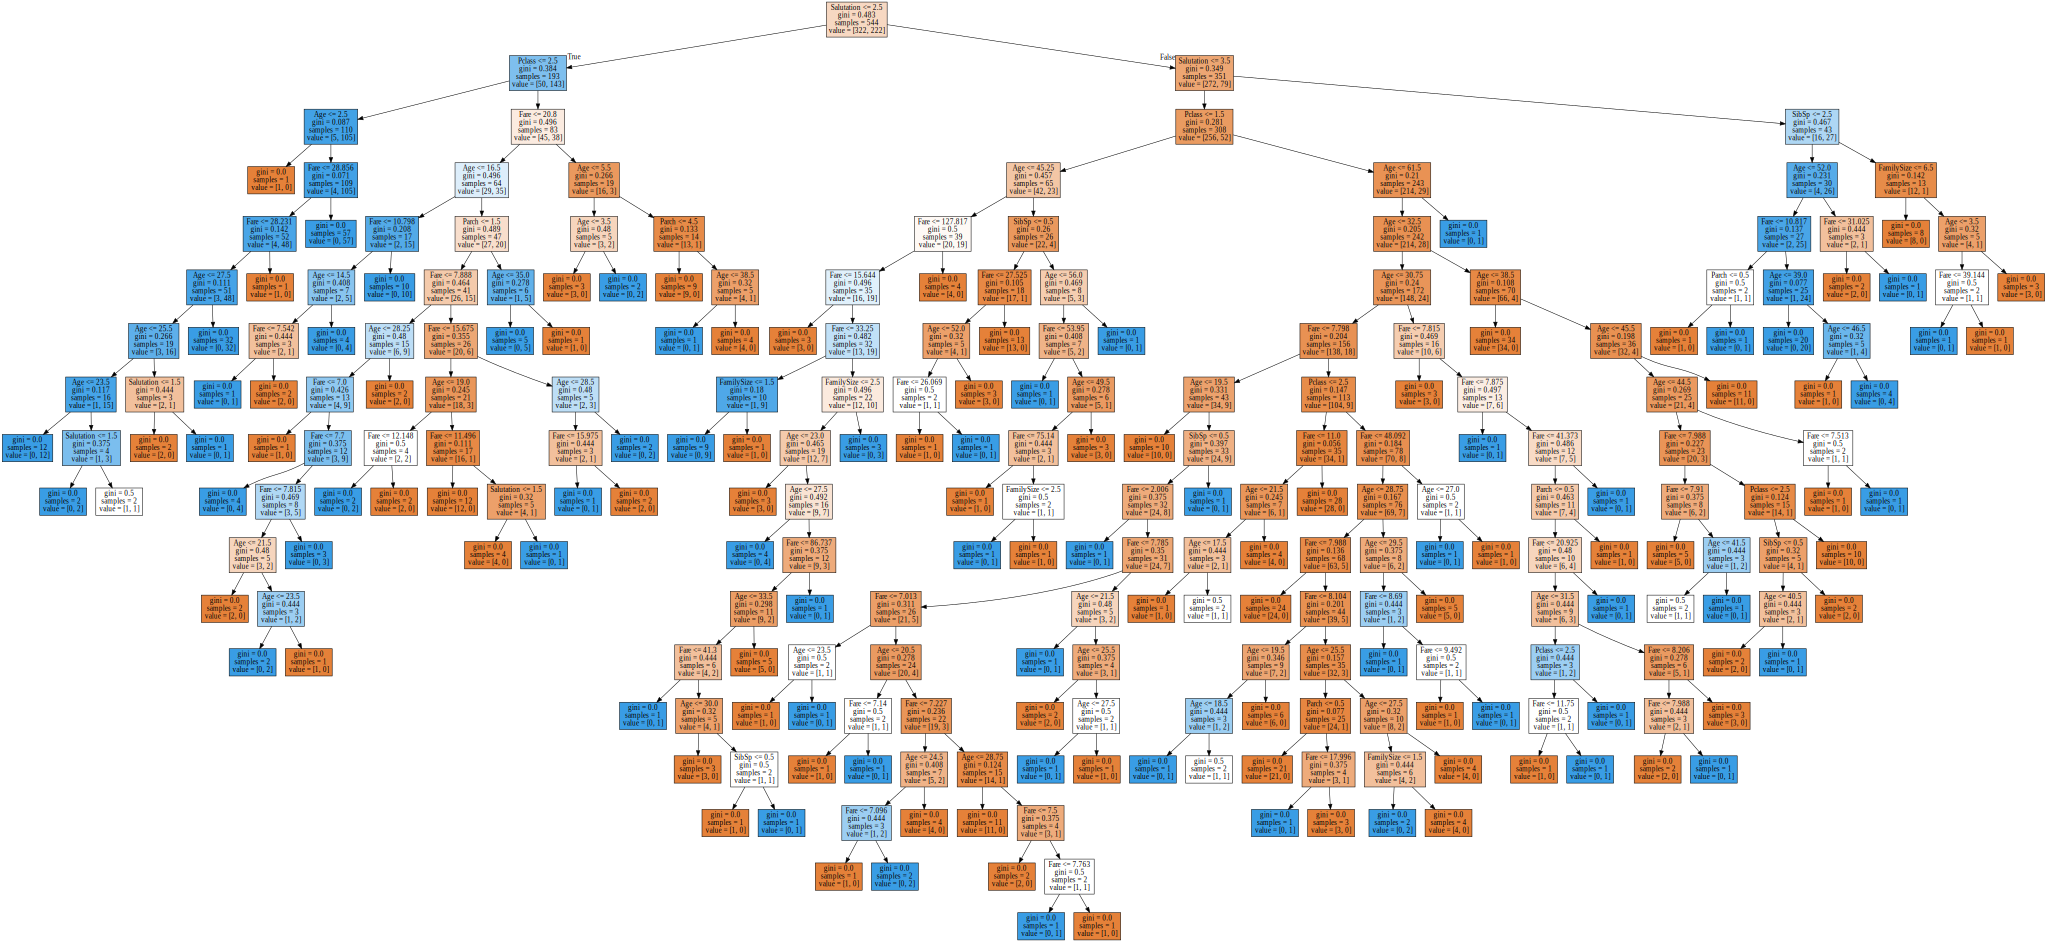

In [144]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=cols,  
                                filled=True)

graphviz.Source(dot_data, format="png") 


#  XGBOOST
## TRAIN RESULTS


 XGBOOST :
Accuracy: 97.43
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       322
           1       0.99      0.95      0.97       222

    accuracy                           0.97       544
   macro avg       0.98      0.97      0.97       544
weighted avg       0.97      0.97      0.97       544

Confusion Matrix:


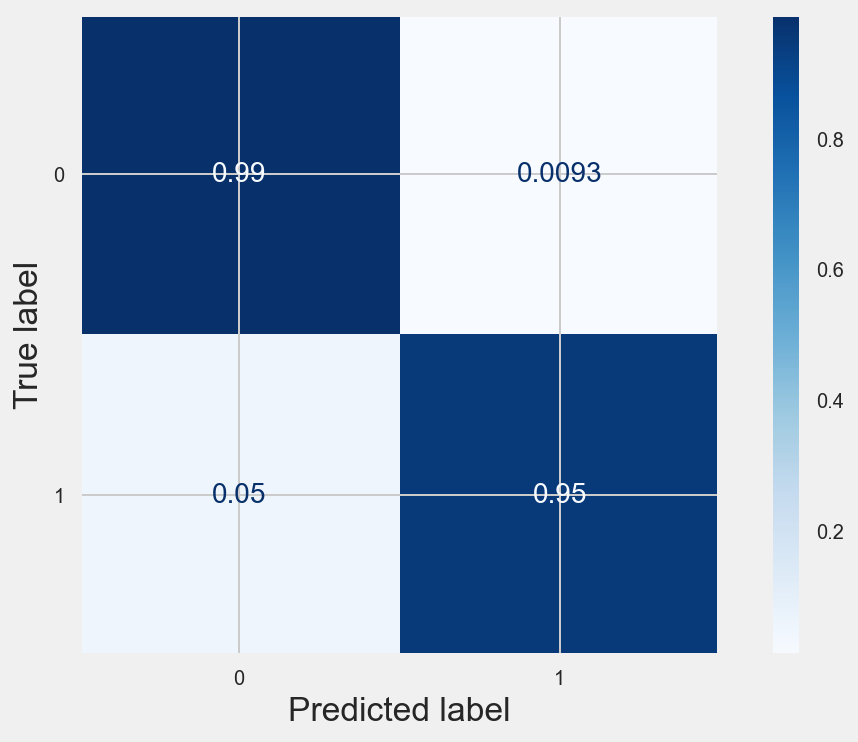

In [145]:
print('\n XGBOOST :')
predictions = xgb.predict(x_train)
accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(xgb,x_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()

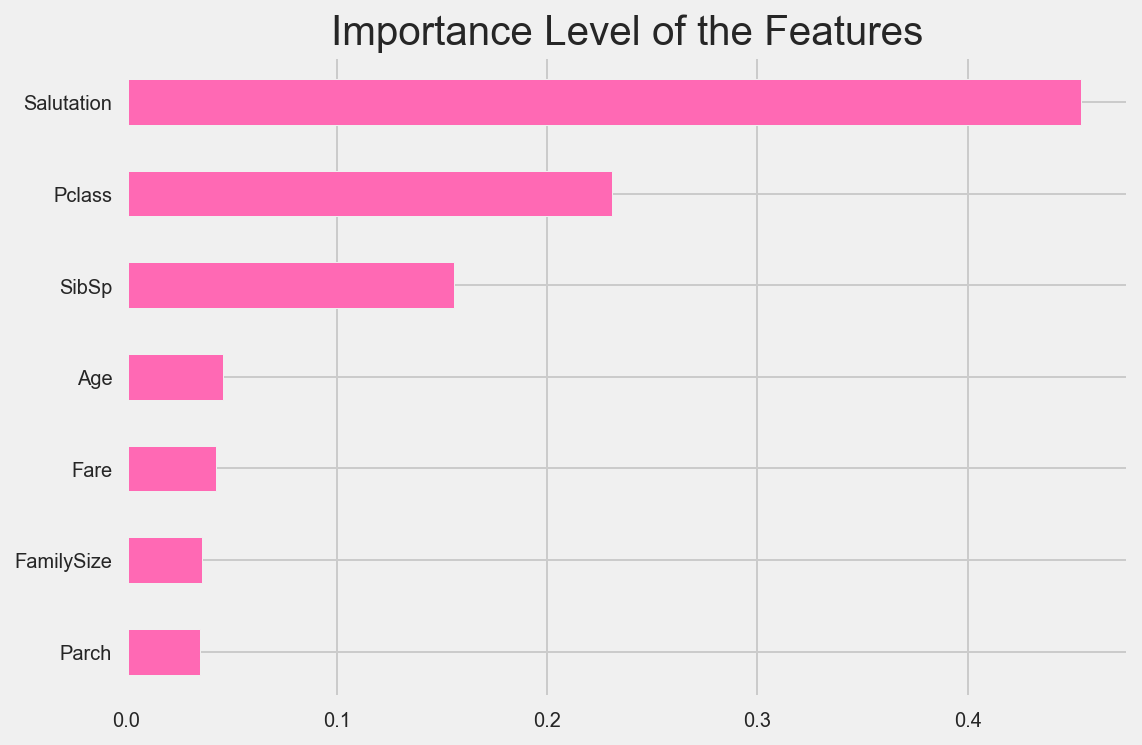

In [146]:
#IMPORTANCE OF FEATURES

importance_level = pd.Series(data=xgb.feature_importances_,
                        index= x_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='HotPink')
plt.title('Importance Level of the Features')
plt.show()

#  XGBOOST
##  TEST RESULTS


 XGBOOST :
Accuracy: 78.68
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        81
           1       0.73      0.75      0.74        55

    accuracy                           0.79       136
   macro avg       0.78      0.78      0.78       136
weighted avg       0.79      0.79      0.79       136

Confusion Matrix:


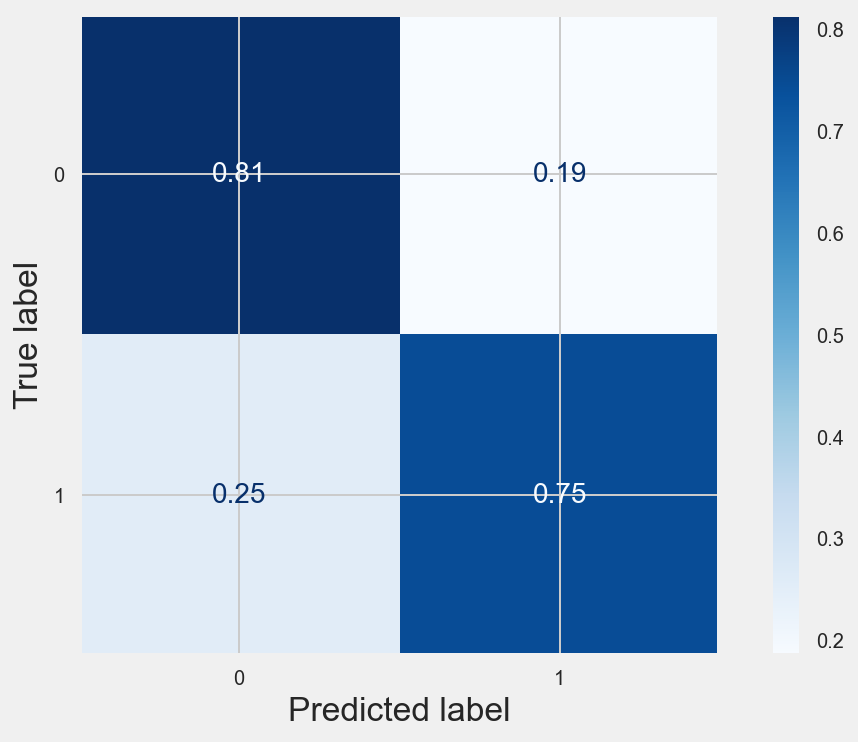

# RANDOM-FOREST
## TRAIN RESULTS



RANDOM-FOREST
Accuracy: 99.26
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       322
           1       0.99      0.99      0.99       222

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544

Confusion Matrix:


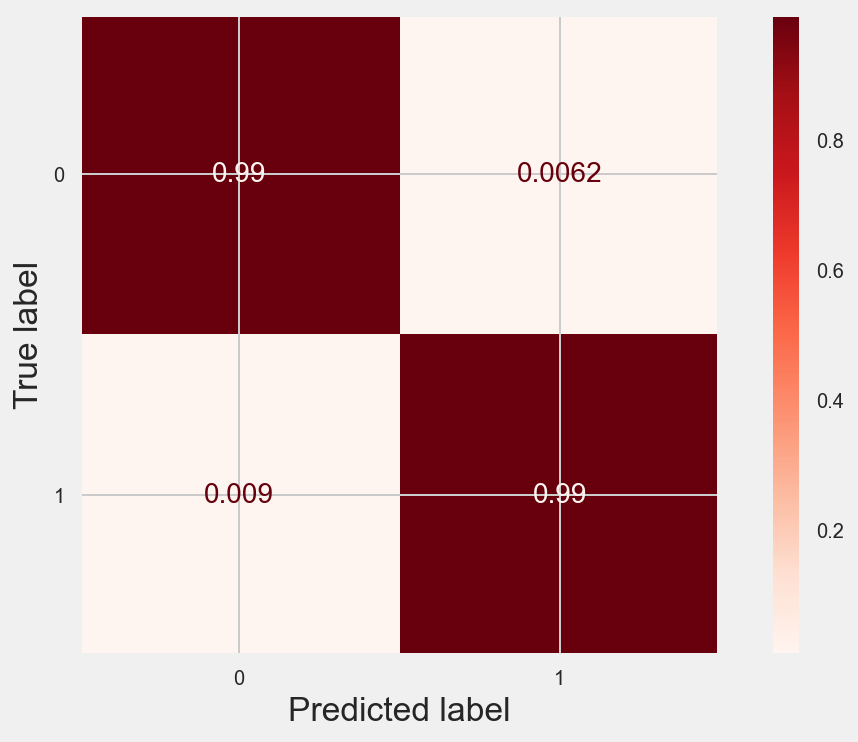

In [148]:
print('\nRANDOM-FOREST')
predictions = random_forest.predict(x_train)
accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(random_forest,x_train, y_train, cmap=plt.cm.Reds, normalize='true')
plt.show()


In [149]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

importance
feature               
Fare             0.272
Age              0.271
Salutation       0.252
Pclass           0.085
FamilySize       0.058
SibSp            0.034
Parch            0.028

<AxesSubplot:xlabel='feature'>

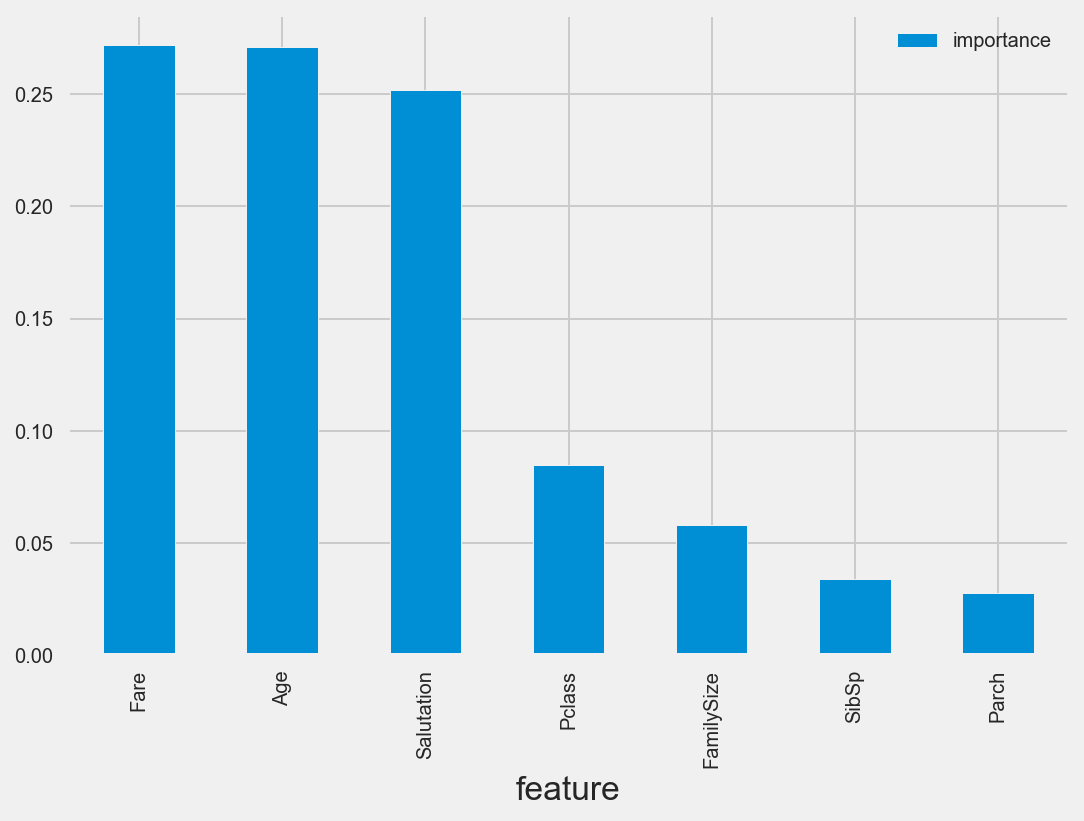

In [150]:
importances.plot.bar()

# RANDOM-FOREST
##  TEST RESULTS


RANDOM-FOREST
Accuracy: 77.94
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        81
           1       0.72      0.75      0.73        55

    accuracy                           0.78       136
   macro avg       0.77      0.77      0.77       136
weighted avg       0.78      0.78      0.78       136

Confusion Matrix:


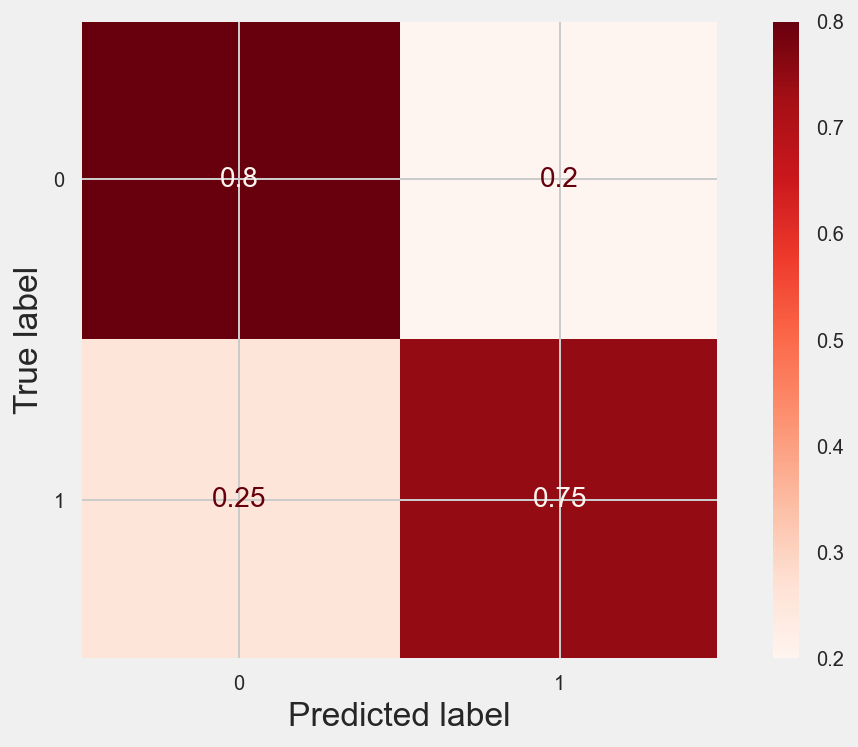

In [151]:
print('\nRANDOM-FOREST')
predictions = random_forest.predict(x_test)
random_forest_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(random_forest_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(random_forest,x_test, y_test, cmap=plt.cm.Reds, normalize='true')
plt.show()

## Which is the Best Training/Test Model ?

In [152]:
results = pd.DataFrame({
    'Test Score':[linear_support_accuracy*100,
                  knn_test_accuracy*100,
                  log_reg_test_accuracy*100,
                  random_forest_test_accuracy*100,
                  gauss_knn_accuracy*100, 
                  perceptron_test_accuracy*100, xgb_test_accuracy*100, sgd_test_accuracy*100, decision_test_accuracy*100],
    
    
    'Train Score': [acc_linear_svc, acc_knn, score*100, 
              acc_random_forest, acc_gaussian, acc_perceptron, xgboost_score*100,
              acc_sgd, acc_decision_tree],
    
     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'XGBOOST',
              'Stochastic Gradient Decent', 
              'Decision Tree'],


})
result_df = results.sort_values(by='Train Score', ascending=False)
result_df = result_df.set_index('Train Score')
result_df.head(9)

Test Score                       Model
Train Score                                        
99.260000     77.941176               Random Forest
99.260000     76.470588               Decision Tree
97.426471     78.676471                     XGBOOST
83.460000     68.382353                         KNN
74.633028     75.735294         Logistic Regression
71.140000     78.676471                 Naive Bayes
70.040000     70.588235     Support Vector Machines
64.340000     64.705882                  Perceptron
61.030000     59.558824  Stochastic Gradient Decent

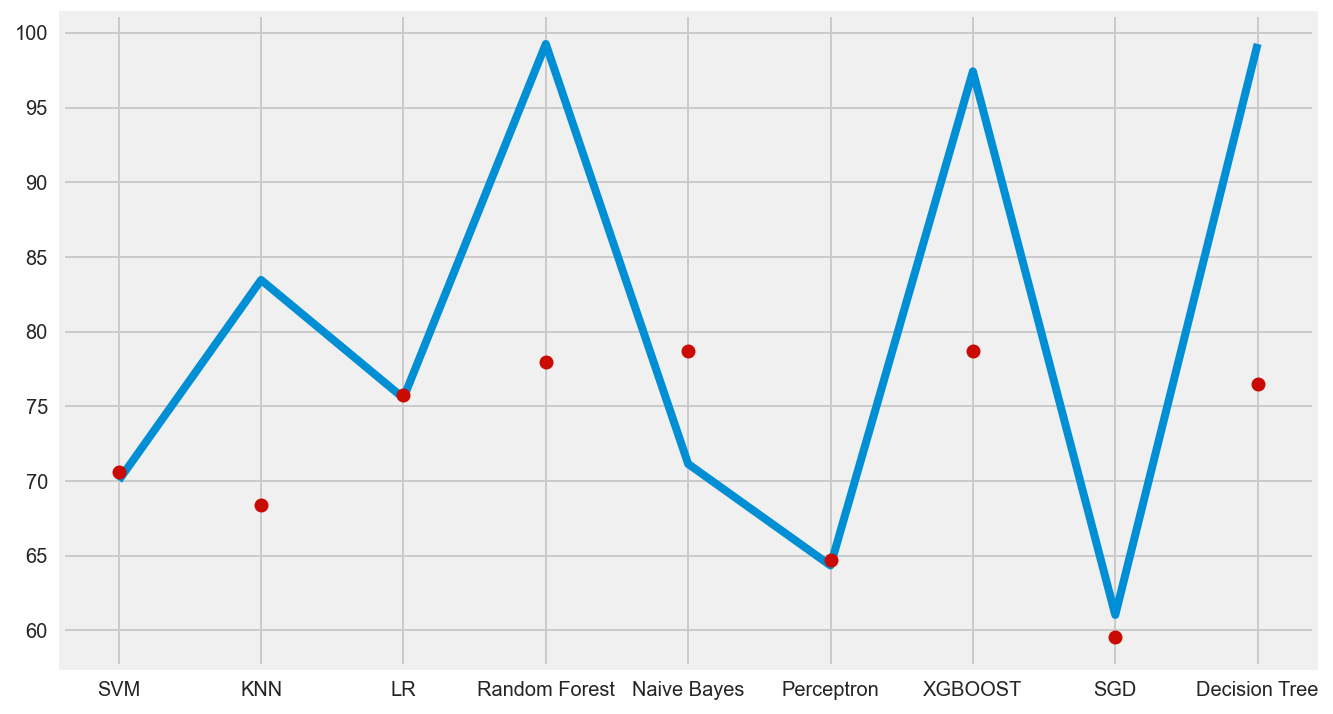

In [153]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(['SVM', 'KNN', 'LR', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'XGBOOST', 'SGD', 
              'Decision Tree'],
         [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, xgboost_score*100, acc_sgd, acc_decision_tree],
         [linear_support_accuracy*100,knn_test_accuracy*100,log_reg_test_accuracy*100,random_forest_test_accuracy*100,gauss_knn_accuracy*100, perceptron_test_accuracy*100, xgb_test_accuracy*100, sgd_test_accuracy*100, decision_test_accuracy*100], 'ro')

plt.show()



## EXAMINE HIGH ACCURATE TRAINING RANDOM FOREST MODEL 

In [154]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[281,  41],
       [ 61, 161]], dtype=int64)

In [155]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7970297029702971
Recall: 0.7252252252252253


In [156]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7594339622641509

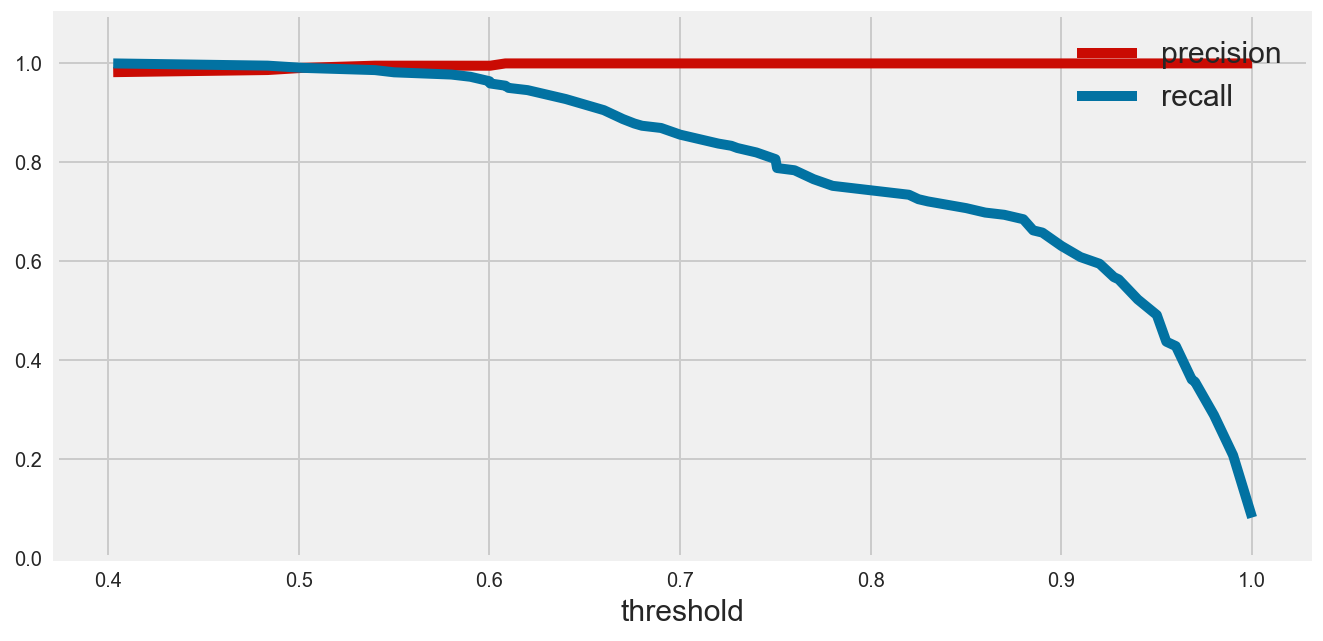

In [157]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=15)
    plt.legend(loc="upper right", fontsize=15)
    plt.ylim([0, 1.1])

plt.figure(figsize=(10, 5))
plot_precision_and_recall(precision, recall, threshold)
plt.show()
#PRECISON(doğru diye tahmin ettiklerinin ne kadar doğru olduğu) 
#RECALL(geçekte doğru olanların ne kadarını doğru bilmiş)a göre çiziliyor


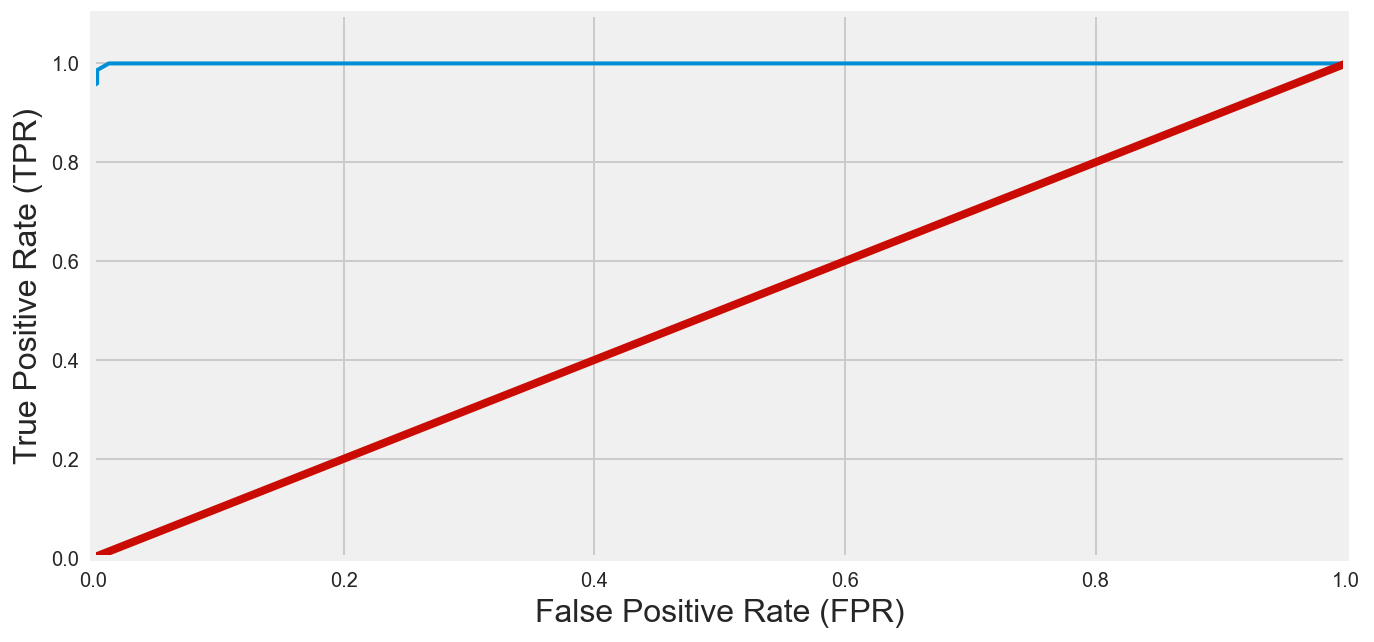

In [158]:
#ROC AUC Curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1.1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# DECISION TREE HYPERPARAMETER TUNING

In [159]:
import random
import os
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    

SEED = 42
set_seed(SEED)

In [160]:
parameters = {
  "max_depth": [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=SEED,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(x_train, y_train)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(f'Mean cross-validated accuracy score of the best_estimator: {model_desicion_tree.best_score_:.3f}')
print('-----')

acc_decision=model_desicion_tree.best_score_*100
acc_decision

Wall time: 0 ns
-----
Best parameters {'max_depth': 3}
Mean cross-validated accuracy score of the best_estimator: 0.814
-----


81.42541624193001

# RANDOM FOREST HYPERPARAMETER TUNING

In [161]:
K_fold = StratifiedKFold(n_splits=10)
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(x_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

gsFRC_random= gsRFC.best_score_*100
gsFRC_random

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   20.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  2.5min finished


83.44781144781145

#KNN HYPERPARAMETER TUNING

In [162]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
grid_knn_clf = GridSearchCV(knn, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_knn_clf.fit(x_train, y_train)
grid_knn_clf.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


{'n_neighbors': 5, 'weights': 'uniform'}

In [163]:
skfold = StratifiedKFold(n_splits=5)
grid_knn_cross_scores = cross_val_score(grid_knn_clf, x_train, y_train, cv=skfold, scoring="accuracy")
grid_knn_pred = grid_knn_clf.predict(x_test).astype(int)
grid_knn_scores = (grid_knn_cross_scores.mean() + accuracy_score (grid_knn_pred, y_test))/2
grid_knn_scores
knn_best= grid_knn_scores*100
knn_best

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished


68.6604055485599

#XGBOOST HYPERPARAMETER TUNING

In [167]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(x_train, y_train)
#grid_search.best_estimator_
xgboost_best= grid_search.best_score_*100
xgboost_best

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   14.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   31.3s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   50.6s
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  1.1min finished


86.71318234219667

In [169]:
results = pd.DataFrame({
    'Test Score':[linear_support_accuracy*100,knn_test_accuracy*100,log_reg_test_accuracy*100,random_forest_test_accuracy*100,gauss_knn_accuracy*100, perceptron_test_accuracy*100, xgb_test_accuracy*100, sgd_test_accuracy*100, decision_test_accuracy*100],
    
    
    'Train Score': [acc_linear_svc, knn_best, score*100, 
              gsFRC_random ,acc_gaussian, acc_perceptron, xgboost_best,
              acc_sgd, acc_decision],
    
     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'XGBOOST',
              'Stochastic Gradient Decent', 
              'Decision Tree'],


})
result_df = results.sort_values(by='Train Score', ascending=False)
result_df = result_df.set_index('Train Score')
result_df.head(9)

Test Score                       Model
Train Score                                        
86.713182     78.676471                     XGBOOST
83.447811     77.941176               Random Forest
81.425416     76.470588               Decision Tree
74.633028     75.735294         Logistic Regression
71.140000     78.676471                 Naive Bayes
70.040000     70.588235     Support Vector Machines
68.660406     68.382353                         KNN
64.340000     64.705882                  Perceptron
61.030000     59.558824  Stochastic Gradient Decent

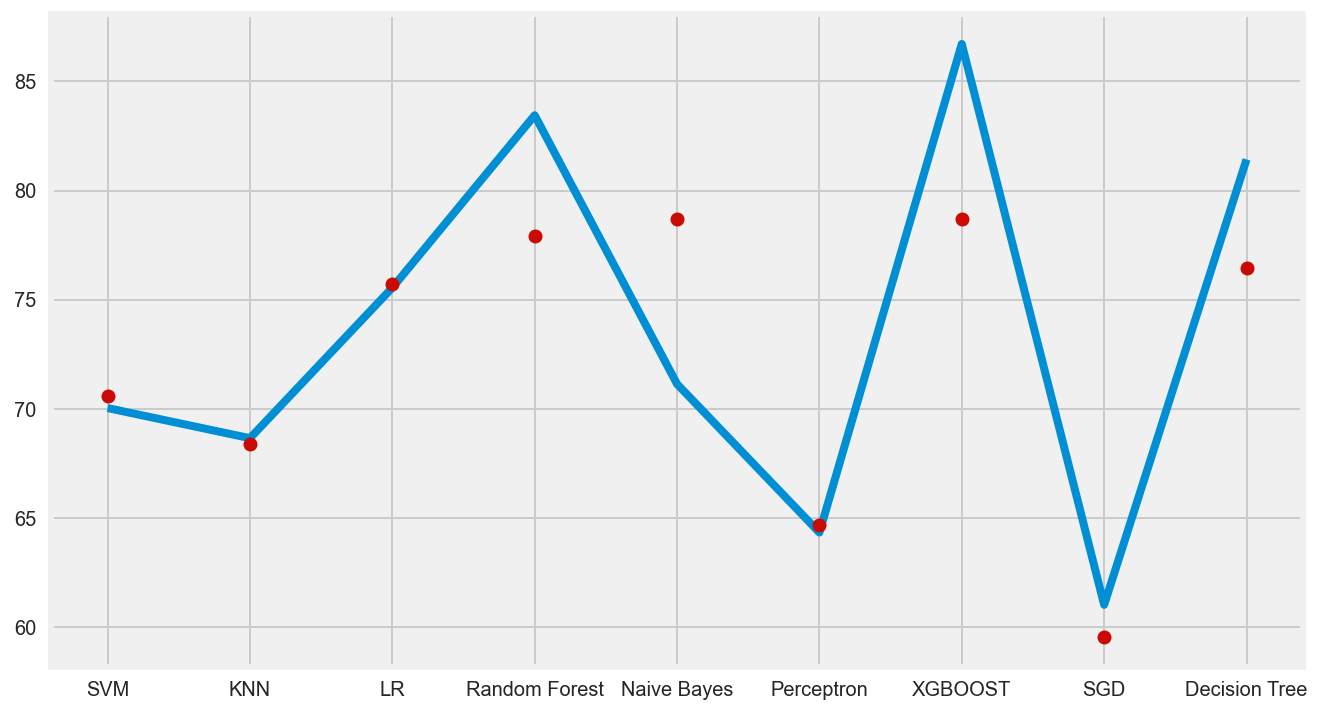

In [166]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(['SVM', 'KNN', 'LR', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'XGBOOST', 'SGD', 
              'Decision Tree'], 
         [acc_linear_svc, knn_best, acc_log, gsFRC_random, acc_gaussian, acc_perceptron, xgboost_best, acc_sgd, acc_decision],
         [linear_support_accuracy*100,knn_test_accuracy*100,log_reg_test_accuracy*100,random_forest_test_accuracy*100,gauss_knn_accuracy*100, perceptron_test_accuracy*100, xgb_test_accuracy*100, sgd_test_accuracy*100, decision_test_accuracy*100], 'ro')

plt.show()

